# Image Classification using K-nearest neighbor


<a id='toc'></a>
## Table of Contents

1. [Preparing and loading data in a proper shape](#section1)<br>
    a. [Writing the modified main dataset to csv and pickle](#section1a)<br>
    b. [Trying KNN classifier on non-randomized data](#section1b)<br>
    c. [Writing all other modified datasets to csv and pickle](#section1c)<br>
2. [Randomizing the dataset](#section2)<br>
    a. [Writing randomized main dataset to csv and pickle](#section2a)<br>
    b. [Plotting a sample of the dataset](#section2b)<br>
    c. [Writing all other modified datasets to csv and pickle](#section2c)<br>
    d. [Trying KNN classifier on randomized data](#section2d)<br>
3. [Normalizing the data](#section3)<br>
    a. [Trying the KNN on normalized data](#section3a)<br>
4. [Deeper Analysis](#section4)<br>
    a. [Extracting 10 best attributes for anger using absolute correlation value](#section4a)<br>
    b. [Extracting 10 best attributes for anger using chi squared](#section4b)<br>
    c. [Extracting 10 best attributes for disgust using absolute correlation value](#section4c)<br>
    d. [Extracting 10 best attributes for disgust using chi squared](#section4d)<br>
    e. [Extracting 10 best attributes for fear using absolute correlation value](#section4e)<br>
    f. [Extracting 10 best attributes for fear using chi squarede](#section4f)<br>
    g. [Extracting 10 best attributes for happy using absolute correlation value](#section4g)<br>
    h. [Extracting 10 best attributes for happy using chi squared](#section4h)<br>
    i. [Extracting 10 best attributes for neutral using absolute correlation value](#section4i)<br>
    j. [Extracting 10 best attributes for neutral using chi squared](#section4j)<br>
    k. [Extracting 10 best attributes for sad using absolute correlation value](#section4k)<br>
    l. [Extracting 10 best attributes for sad using chi squared](#section4l)<br>
    m. [Extracting 10 best attributes for surprise using absolute correlation value](#section4m)<br>
    n. [Extracting 10 best attributes for surprise using chi squared](#section4n)<br>
5. [Improving the classifier by selecting best attributes from the main dataset](#section5)<br>
    a. [Extracting best 70 attributes](#section5a)<br>
    b. [Extracting best 35 attributes](#section5b)<br>
    c. [Extracting best 14 attributes](#section5c)<br>
6. [Experimenting with the classifier](#section6)<br>
    a. [Running the KNN classifier on 70 best attributes and with different numbers of neighbors](#section6a)<br>
    b. [Trying cross validation on 70 best attributes dataset](#section6b)<br>
    c. [Running the KNN classifier on 35 best attributes and with different numbers of neighbors](#section6c)<br>
    d. [Trying cross validation on 35 best attributes dataset](#section6d)<br>
    e. [Running the KNN classifier on 14 best attributes and with different numbers of neighbors](#section6e)<br>
    f. [Trying cross validation on 14 best attributes dataset](#section6f)<br>
7. [References](#section7)<br>

Import libraries

In [544]:
import glob
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import itertools
from scipy import interp

<a id='section1'></a>
[Top](#toc)
## 1. Preparing the data's shape and format before importing and working with it

Define the header we will use for the csv files

In [2]:
# We know that we have 48x48 pixel images, which gives us 2304 pixel in total
# we will use each pixel as a feature later, so we will generate a header with column names
# corresponsing to the pixel numbers as attributes
header = []

for i in range(2304):
    header.append('pixel'+str(i))

print(header)

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91

In [61]:
# Create a dictionary to map labels to emotion name
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
    4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Create a list of classes to use for the confusion matrices
classes = list(emotions.values())

<hr>

Read and edit the csv files to put each pixel value in a separate column

In [3]:
# Use python pandas library to read the csv file, with no headers, and discarding the first row which
# has the names 'emotion' and 'pixel' as column names
main_dataset = pd.read_csv('fer2018/fer2018.csv',
                           header=None, skiprows=1)
main_dataset.head(20)

,0,1
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [4]:
# Select the dataset and add the header we created earlier
# then we select the first column for each instance in our dataset
# and split the string containing image pixel value, we split by spaces
# and we expand the separated values into a new column for each that will be
# appended to the dataframe
main_dataset[header] = main_dataset[1].str.split(' ', expand=True)

# We drop the second column that has the pixel values as one string
main_dataset = main_dataset.drop([1], axis=1)

# We rename the first column to 'emotion'
main_dataset.rename(columns={0:'emotion'}, inplace=True) 

# View the result of the previous operations
main_dataset.head(20)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,2,55,55,55,55,55,54,60,68,54,...,90,83,77,53,37,34,30,34,30,57
6,4,20,17,19,21,25,38,42,42,46,...,29,36,68,91,85,93,97,99,107,118
7,3,77,78,79,79,78,75,60,55,47,...,126,124,139,150,179,180,175,125,67,68
8,3,85,84,90,121,101,102,133,153,153,...,132,151,111,106,102,99,89,58,73,84
9,2,255,254,255,254,254,179,122,107,95,...,160,176,188,251,252,253,253,254,255,255


<a id='section1a'></a>
[Top](#toc)<br>
Write the modified dataframe to csv

In [ ]:
main_dataset.to_csv('generated_data/preprocessed_csv/fer2018.csv',
                   index=False)

Convert dataframe to pickle

In [ ]:
main_dataset.to_pickle('generated_data/pickled/fer2018.pkl')

Test reading the pickled data into a dataframe

In [ ]:
main_dataset_pickled = pd.read_pickle('generated_data/pickled/fer2018.pkl')
main_dataset_pickled.head(10)

<hr>

<a id='section1b'></a>
[Top](#toc)
#### Trying the Nearest neighbor classifier on non-randomized data

Read the main dataset from and split the class column

In [5]:
# Select the column named 'emotion' from the dataset and save that alone as labels
labels_non_rnd = main_dataset[['emotion']]

# View the result
pd.DataFrame(labels_non_rnd).head(10)

,emotion
0,0
1,0
2,2
3,4
4,6
5,2
6,4
7,3
8,3
9,2


Mark the rest of the dataset as features

In [6]:
# Select all columns starting from the second column (the ones following the emotion column)
# and save them into a new features set
features_non_rnd = main_dataset.iloc[:, 1:]

# View the result
features_non_rnd.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,55,55,55,55,55,54,60,68,54,85,...,90,83,77,53,37,34,30,34,30,57
6,20,17,19,21,25,38,42,42,46,54,...,29,36,68,91,85,93,97,99,107,118
7,77,78,79,79,78,75,60,55,47,48,...,126,124,139,150,179,180,175,125,67,68
8,85,84,90,121,101,102,133,153,153,169,...,132,151,111,106,102,99,89,58,73,84
9,255,254,255,254,254,179,122,107,95,124,...,160,176,188,251,252,253,253,254,255,255


Create train and test sets of the features and labels ~70-30

In [7]:
# Use scikit learn's train_test_split function
X_train_non_rnd = features_non_rnd.iloc[:25000]
X_test_non_rnd = features_non_rnd.iloc[25001:]
y_train_non_rnd = labels_non_rnd.iloc[:25000]
y_test_non_rnd = labels_non_rnd.iloc[25001:]

In [8]:
# View the results
X_train_non_rnd.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,55,55,55,55,55,54,60,68,54,85,...,90,83,77,53,37,34,30,34,30,57
6,20,17,19,21,25,38,42,42,46,54,...,29,36,68,91,85,93,97,99,107,118
7,77,78,79,79,78,75,60,55,47,48,...,126,124,139,150,179,180,175,125,67,68
8,85,84,90,121,101,102,133,153,153,169,...,132,151,111,106,102,99,89,58,73,84
9,255,254,255,254,254,179,122,107,95,124,...,160,176,188,251,252,253,253,254,255,255


In [9]:
# View the labels and make sure they're in the expected order as the corresponding features
pd.DataFrame(y_train_non_rnd).head(10)

,emotion
0,0
1,0
2,2
3,4
4,6
5,2
6,4
7,3
8,3
9,2


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [10]:
X_train_non_rnd = np.asarray(X_train_non_rnd)
X_test_non_rnd = np.asarray(X_test_non_rnd)
y_train_non_rnd = np.asarray(y_train_non_rnd)
y_test_non_rnd = np.asarray(y_test_non_rnd)

In [11]:
print('Training examples: {}'.format(X_train_non_rnd.shape))
print('Testing examples: {}'.format(X_test_non_rnd.shape))
print('Training labels: {}'.format(y_train_non_rnd.shape))
print('Testing labels: {}'.format(y_test_non_rnd.shape))

Training examples: (25000, 2304)
Testing examples: (10886, 2304)
Training labels: (25000, 1)
Testing labels: (10886, 1)


In [12]:
# Reshape the labels to the format expected by the KNN classifier function (n_samples, )
y_train_non_rnd = y_train_non_rnd.reshape(y_train_non_rnd.shape[0], )
y_test_non_rnd = y_test_non_rnd.reshape(y_test_non_rnd.shape[0], )

In [13]:
# View the results
y_train_non_rnd.shape

(25000,)

<hr>

Create the classifier

In [14]:
# Use scikit learn's KNeighborsClassifier and set the number of neighbors to 3
neigh_k3_non_rnd = KNeighborsClassifier(n_neighbors=3)

# Train on our training split and labels
neigh_k3_non_rnd.fit(X_train_non_rnd, y_train_non_rnd)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [405]:
# Predict on the test split and return the resulting array
pred_non_rnd = neigh_k3_non_rnd.predict(X_test_non_rnd)

In [15]:
# Test the model on the test split
neigh_k3_non_rnd.score(X_test_non_rnd, y_test_non_rnd)

0.3236266764651846

Create confusion matrix

In [403]:
# Code provided by scikit learn's documentation at
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Define a function to visualize a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

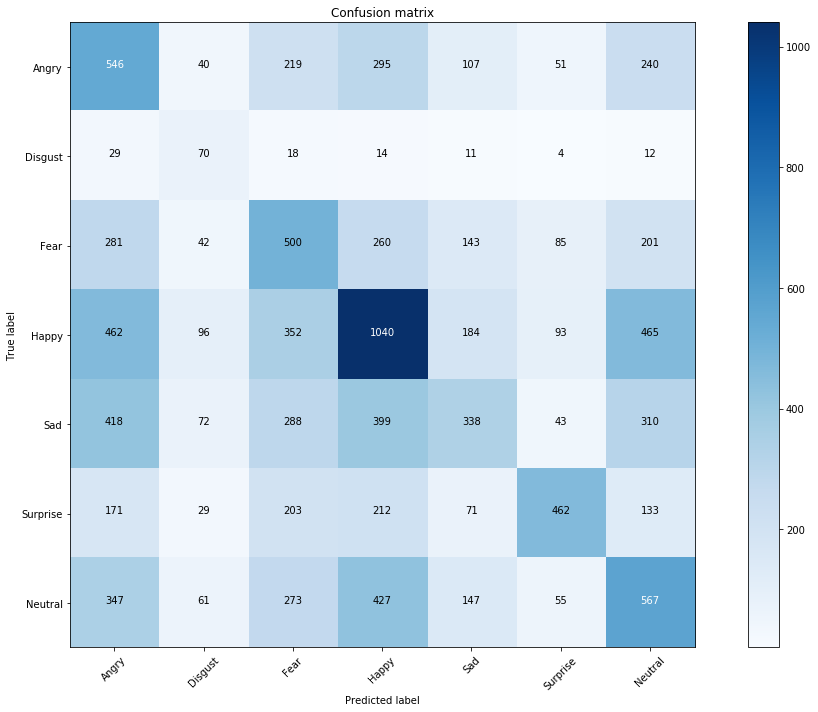

In [409]:
# Compute confusion matrix
cnf_matrix_non_rnd = confusion_matrix(y_test_non_rnd, pred_non_rnd)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_non_rnd, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [454]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_non_rnd = cnf_matrix_non_rnd.sum(axis=0) - np.diag(cnf_matrix_non_rnd)
FN_non_rnd = cnf_matrix_non_rnd.sum(axis=1) - np.diag(cnf_matrix_non_rnd)
TP_non_rnd = np.diag(cnf_matrix_non_rnd)
TN_non_rnd = cnf_matrix_non_rnd.ravel().sum() - (FP_non_rnd + FN_non_rnd + TP_non_rnd)

# True positive rate (sensitivity)
TPR_non_rnd = TP_non_rnd / (TP_non_rnd + FN_non_rnd)
# True negative rate (specificity)
TNR_non_rnd = TN_non_rnd / (TN_non_rnd + FP_non_rnd)
# False positive rate
FPR_non_rnd = FP_non_rnd / (FP_non_rnd + TN_non_rnd)

In [455]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[0], FPR_non_rnd[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[1], FPR_non_rnd[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[2], FPR_non_rnd[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[3], FPR_non_rnd[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[4], FPR_non_rnd[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[5], FPR_non_rnd[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[6], FPR_non_rnd[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.364 			 0.182
Disgust 		 0.443 			 0.032
Fear 			 0.331 			 0.144
Happy 			 0.386 			 0.196
Sad 			 0.181 			 0.074
Surprise 		 0.361 			 0.034
Neutral 		 0.302 			 0.151


In [422]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_non_rnd, pred_non_rnd, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.24      0.36      0.29      1498
    Disgust       0.17      0.44      0.25       158
       Fear       0.27      0.33      0.30      1512
      Happy       0.39      0.39      0.39      2692
        Sad       0.34      0.18      0.24      1868
   Surprise       0.58      0.36      0.45      1281
    Neutral       0.29      0.30      0.30      1877

avg / total       0.35      0.32      0.33     10886



<hr>

<a id='section1c'></a>
[Top](#toc)<br>
Repeat the previous preprocessing steps with all other files

1.Angry

In [16]:
angry_dataset = pd.read_csv('fer2018/fer2018angry.csv',
                           header=None, skiprows=1)
angry_dataset[header] = angry_dataset[1].str.split(' ', expand=True)
angry_dataset = angry_dataset.drop([1], axis=1)
angry_dataset.rename(columns={0:'emotion'}, inplace=True) 
angry_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,1,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,1,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
angry_dataset.to_csv('generated_data/preprocessed_csv/fer2018angry.csv',
                   index=False)

In [ ]:
angry_dataset.to_pickle('generated_data/pickled/fer2018angry.pkl')

<hr>

2.Disgust

In [17]:
disgust_dataset = pd.read_csv('fer2018/fer2018disgust.csv',
                           header=None, skiprows=1)
disgust_dataset[header] = disgust_dataset[1].str.split(' ', expand=True)
disgust_dataset = disgust_dataset.drop([1], axis=1)
disgust_dataset.rename(columns={0:'emotion'}, inplace=True) 
disgust_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
disgust_dataset.to_csv('generated_data/preprocessed_csv/fer2018disgust.csv',
                   index=False)

In [ ]:
disgust_dataset.to_pickle('generated_data/pickled/fer2018disgust.pkl')

<hr>

3.Fear

In [18]:
fear_dataset = pd.read_csv('fer2018/fer2018fear.csv',
                           header=None, skiprows=1)
fear_dataset[header] = fear_dataset[1].str.split(' ', expand=True)
fear_dataset = fear_dataset.drop([1], axis=1)
fear_dataset.rename(columns={0:'emotion'}, inplace=True) 
fear_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,1,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
fear_dataset.to_csv('generated_data/preprocessed_csv/fer2018fear.csv',
                   index=False)

In [ ]:
fear_dataset.to_pickle('generated_data/pickled/fer2018fear.pkl')

<hr>

4.Happy

In [19]:
happy_dataset = pd.read_csv('fer2018/fer2018happy.csv',
                           header=None, skiprows=1)
happy_dataset[header] = happy_dataset[1].str.split(' ', expand=True)
happy_dataset = happy_dataset.drop([1], axis=1)
happy_dataset.rename(columns={0:'emotion'}, inplace=True) 
happy_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
happy_dataset.to_csv('generated_data/preprocessed_csv/fer2018happy.csv',
                   index=False)

In [ ]:
happy_dataset.to_pickle('generated_data/pickled/fer2018happy.pkl')

<hr>

5.Neutral

In [20]:
neutral_dataset = pd.read_csv('fer2018/fer2018neutral.csv',
                           header=None, skiprows=1)
neutral_dataset[header] = neutral_dataset[1].str.split(' ', expand=True)
neutral_dataset = neutral_dataset.drop([1], axis=1)
neutral_dataset.rename(columns={0:'emotion'}, inplace=True) 
neutral_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,1,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
neutral_dataset.to_csv('generated_data/preprocessed_csv/fer2018neutral.csv',
                   index=False)

In [ ]:
neutral_dataset.to_pickle('generated_data/pickled/fer2018neutral.pkl')

<hr>

6.Sad

In [21]:
sad_dataset = pd.read_csv('fer2018/fer2018sad.csv',
                           header=None, skiprows=1)
sad_dataset[header] = sad_dataset[1].str.split(' ', expand=True)
sad_dataset = sad_dataset.drop([1], axis=1)
sad_dataset.rename(columns={0:'emotion'}, inplace=True) 
sad_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,1,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
sad_dataset.to_csv('generated_data/preprocessed_csv/fer2018sad.csv',
                   index=False)

In [ ]:
sad_dataset.to_pickle('generated_data/pickled/fer2018sad.pkl')

<hr>

7.Surprise

In [22]:
surprise_dataset = pd.read_csv('fer2018/fer2018surprise.csv',
                           header=None, skiprows=1)
surprise_dataset[header] = surprise_dataset[1].str.split(' ', expand=True)
surprise_dataset = surprise_dataset.drop([1], axis=1)
surprise_dataset.rename(columns={0:'emotion'}, inplace=True) 
surprise_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
surprise_dataset.to_csv('generated_data/preprocessed_csv/fer218surprise.csv',
                   index=False)

In [ ]:
surprise_dataset.to_pickle('generated_data/pickled/fer2018surprise.pkl')

<hr>

<a id='section2'></a>
[Top](#toc)
## 2. Randomize Data

1.Main dataset

In [23]:
# We use scikit learn's shuffle function to randomize our data
# we add a value for random state to the randomization pattern
# can be reproduces later
main_dataset_shuffled = shuffle(main_dataset, random_state=42)

# View the result
main_dataset_shuffled.head(10)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,3,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,6,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,0,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,4,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,0,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137
25499,6,0,0,0,0,1,15,31,73,81,...,150,152,210,204,199,192,188,199,156,31
26653,4,127,189,193,193,197,191,192,193,189,...,185,181,178,174,169,163,159,153,149,145
7646,2,179,145,113,89,45,37,64,48,46,...,74,121,203,184,113,42,38,120,194,167
31831,6,0,0,0,0,0,0,0,0,0,...,176,181,180,180,177,177,179,184,190,185
20526,2,213,198,227,176,77,102,112,200,232,...,4,18,36,29,48,187,217,220,221,216


<a id='section2a'></a>
[Top](#toc)<br>
Write randomized data

In [ ]:
main_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018.csv')

In [ ]:
main_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018.pkl')

<a id='section2b'></a>
[Top](#toc)<br>
Plot images

Label is: 3 => Happy


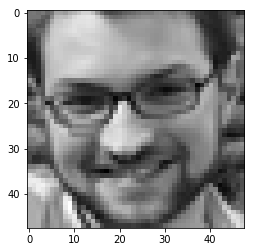

In [93]:
# Randomly select an image from the dataset
index = int(np.random.randint(low=0, high=main_dataset_shuffled.shape[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index, 1:], dtype=np.float64).reshape((48, 48))

# Using matplotlib to plot the image
plt.imshow(image, cmap='gray')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index, 0], emotions[main_dataset_shuffled.iloc[index, 0]]))

<hr>

<a id='section2c'></a>
[Top](#toc)<br>
Repeat shuffling and saving for the rest of the files

2.Angry Dataset

In [24]:
angry_dataset_shuffled = shuffle(angry_dataset, random_state=42)
angry_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,0,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,0,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,1,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,0,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,1,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137


In [ ]:
angry_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018angry.csv')

In [ ]:
angry_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018angry.pkl')

<hr>

3.Disgust Dataset

In [25]:
disgust_dataset_shuffled = shuffle(disgust_dataset, random_state=42)
disgust_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,0,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,0,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,0,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,0,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,0,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137


In [ ]:
disgust_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018disgust.csv')

In [ ]:
disgust_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018disgust.pkl')

<hr>

4.Fear Dataset

In [26]:
fear_dataset_shuffled = shuffle(fear_dataset, random_state=42)
fear_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,0,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,0,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,0,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,0,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,0,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137


In [ ]:
fear_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018fear.csv')

In [ ]:
fear_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018fear.pkl')

<hr>

5.Happy Dataset

In [27]:
happy_dataset_shuffled = shuffle(happy_dataset, random_state=42)
happy_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,1,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,0,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,0,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,0,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,0,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137


In [ ]:
happy_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018happy.csv')

In [ ]:
happy_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018happy.pkl')

<hr>

6.Neutral Dataset

In [28]:
neutral_dataset_shuffled = shuffle(neutral_dataset, random_state=42)
neutral_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,0,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,1,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,0,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,0,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,0,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137


In [ ]:
neutral_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018neutral.csv')

In [ ]:
neutral_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018neutral.pkl')

<hr>

7.Sad Dataset

In [59]:
sad_dataset_shuffled = shuffle(sad_dataset, random_state=42)
sad_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,0,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,0,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,0,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,1,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,0,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137


In [ ]:
sad_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018sad.csv')

In [ ]:
sad_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018sad.pkl')

<hr>

8.Surprise Dataset

In [94]:
surprise_dataset_shuffled = shuffle(surprise_dataset, random_state=42)
surprise_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,0,142,148,152,158,163,163,166,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,0,60,63,54,45,48,45,38,38,43,...,29,24,24,27,29,29,31,34,32,33
16564,0,133,46,31,37,41,42,57,48,51,...,156,146,129,124,125,135,132,126,142,147
10650,0,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,0,255,254,255,224,102,64,56,83,82,...,213,209,198,202,214,217,214,209,169,137


In [ ]:
surprise_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018surprise.csv')

In [ ]:
surprise_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018surprise.pkl')

<hr>

<a id='section2d'></a>
[Top](#toc)
#### Build Nearest Neighbor Classifier for 3 neighbors on shuffled data

Read the main shuffled dataset from csv and split the class column

In [95]:
# Select the column named 'emotion' from the dataset and save that alone as labels
labels_shuffled = main_dataset_shuffled[['emotion']]

# View the result
pd.DataFrame(labels_shuffled).head(10)

,emotion
19098,3
2043,6
16564,0
10650,4
4955,0
25499,6
26653,4
7646,2
31831,6
20526,2


Mark the rest of the dataset as features

In [96]:
# Select all columns starting from the second column (the ones following the emotion column)
# and save them into a new features set
features_shuffled = main_dataset_shuffled.iloc[:, 1:]

# View the result
features_shuffled.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19098,142,148,152,158,163,163,166,167,167,167,...,183,181,176,170,176,161,41,17,19,24
2043,60,63,54,45,48,45,38,38,43,41,...,29,24,24,27,29,29,31,34,32,33
16564,133,46,31,37,41,42,57,48,51,83,...,156,146,129,124,125,135,132,126,142,147
10650,0,0,0,0,0,0,0,0,0,0,...,202,202,207,216,224,196,180,198,210,231
4955,255,254,255,224,102,64,56,83,82,72,...,213,209,198,202,214,217,214,209,169,137
25499,0,0,0,0,1,15,31,73,81,63,...,150,152,210,204,199,192,188,199,156,31
26653,127,189,193,193,197,191,192,193,189,190,...,185,181,178,174,169,163,159,153,149,145
7646,179,145,113,89,45,37,64,48,46,58,...,74,121,203,184,113,42,38,120,194,167
31831,0,0,0,0,0,0,0,0,0,0,...,176,181,180,180,177,177,179,184,190,185
20526,213,198,227,176,77,102,112,200,232,235,...,4,18,36,29,48,187,217,220,221,216


Create train and test sets of the features and labels 70-30

In [97]:
# Use scikit learn's train_test_split function
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(features_shuffled,
                                                                                        labels_shuffled,
                                                                                        test_size=0.3,
                                                                                        random_state=42)

In [98]:
# View the results
X_train_shuffled.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
23996,10,11,15,27,33,42,63,69,89,105,...,86,88,80,79,99,104,105,106,106,107
10815,160,162,162,161,163,160,169,142,41,34,...,35,34,32,33,30,35,40,41,45,46
11819,111,106,100,103,118,118,126,105,78,80,...,89,96,104,112,115,119,131,141,135,89
5442,214,210,219,164,104,91,67,55,41,76,...,80,70,73,63,42,79,54,54,64,50
12212,192,113,112,130,127,101,96,107,116,136,...,202,210,212,214,215,219,220,217,206,181
31218,253,254,253,254,254,253,251,255,237,176,...,122,125,130,138,144,151,160,167,176,179
11407,51,46,67,40,121,184,178,190,193,194,...,0,2,5,2,1,6,6,6,8,8
30806,157,96,87,56,34,61,58,44,47,44,...,143,152,160,152,145,154,153,144,143,155
14120,129,129,129,129,129,129,129,129,131,134,...,103,98,91,83,78,79,79,81,94,96
660,95,95,97,97,100,104,99,98,95,86,...,1,1,0,7,25,15,11,23,29,12


In [99]:
# View the labels and make sure they're in the expected order as the corresponding features
pd.DataFrame(y_train_shuffled).head(10)

,emotion
23996,6
10815,6
11819,3
5442,5
12212,4
31218,4
11407,5
30806,2
14120,0
660,5


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [100]:
X_train_shuffled = np.asarray(X_train_shuffled)
X_test_shuffled = np.asarray(X_test_shuffled)
y_train_shuffled = np.asarray(y_train_shuffled)
y_test_shuffled = np.asarray(y_test_shuffled)

In [101]:
print('Training examples: {}'.format(X_train_shuffled.shape))
print('Testing examples: {}'.format(X_test_shuffled.shape))
print('Training labels: {}'.format(y_train_shuffled.shape))
print('Testing labels: {}'.format(y_test_shuffled.shape))

Training examples: (25120, 2304)
Testing examples: (10767, 2304)
Training labels: (25120, 1)
Testing labels: (10767, 1)


In [102]:
# Reshape the labels to the format expected by the KNN classifier function (n_samples, )
y_train_shuffled = y_train_shuffled.reshape(y_train_shuffled.shape[0], )
y_test_shuffled = y_test_shuffled.reshape(y_test_shuffled.shape[0], )

In [103]:
# View the results
y_train_shuffled.shape

(25120,)

Create the classifier

In [104]:
# Use scikit learn's KNeighborsClassifier and set the number of neighbors to 3
neigh_k3_shuffled = KNeighborsClassifier(n_neighbors=3)

# Train on our training split and labels
neigh_k3_shuffled.fit(X_train_shuffled, y_train_shuffled) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [105]:
# Test the model on the test split
neigh_k3_shuffled.score(X_test_shuffled, y_test_shuffled)

0.3333333333333333

In [410]:
# Predict on the test split and return the resulting array
pred_shuffled = neigh_k3_shuffled.predict(X_test_shuffled)

Create confusion matrix

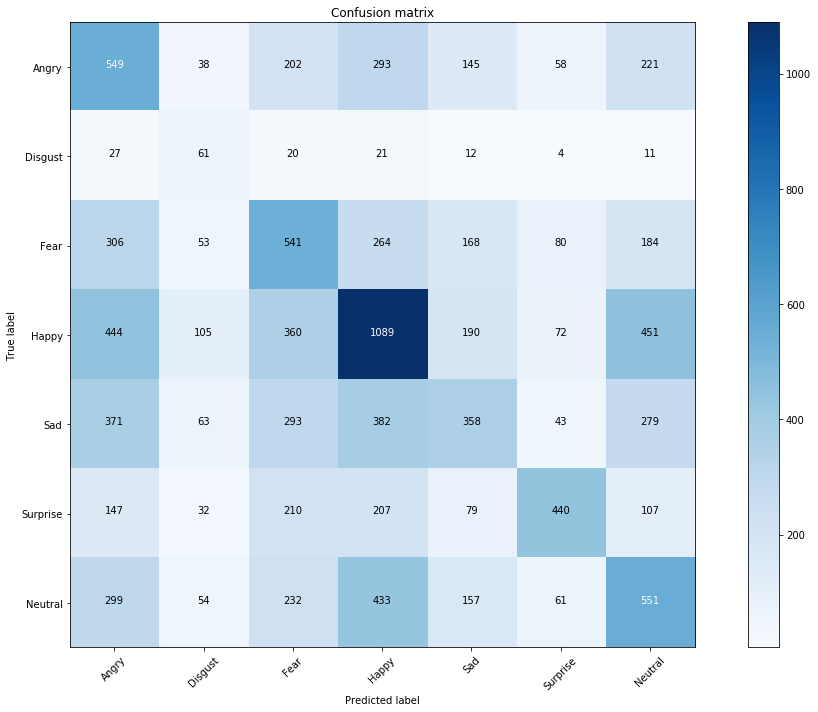

In [411]:
# Compute confusion matrix
cnf_matrix_shuffled = confusion_matrix(y_test_shuffled, pred_shuffled)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_shuffled, classes=classes,
                      title='Confusion matrix')

plt.show()

**Result:** Randomizing the dataset slightly improves the classifier's performance

<hr>

Evaluate the classifier using different metrics

In [458]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_shuffled = cnf_matrix_shuffled.sum(axis=0) - np.diag(cnf_matrix_shuffled)
FN_shuffled = cnf_matrix_shuffled.sum(axis=1) - np.diag(cnf_matrix_shuffled)
TP_shuffled = np.diag(cnf_matrix_shuffled)
TN_shuffled = cnf_matrix_shuffled.ravel().sum() - (FP_shuffled + FN_shuffled + TP_shuffled)

# True positive rate (sensitivity)
TPR_shuffled = TP_shuffled / (TP_shuffled + FN_shuffled)
# True negative rate (specificity)
TNR_shuffled = TN_shuffled / (TN_shuffled + FP_shuffled)
# False positive rate
FPR_shuffled = FP_shuffled / (FP_shuffled + TN_shuffled)

In [459]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[0], FPR_shuffled[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[1], FPR_shuffled[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[2], FPR_shuffled[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[3], FPR_shuffled[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[4], FPR_shuffled[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[5], FPR_shuffled[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[6], FPR_shuffled[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.365 			 0.172
Disgust 		 0.391 			 0.033
Fear 			 0.339 			 0.144
Happy 			 0.402 			 0.199
Sad 			 0.200 			 0.084
Surprise 		 0.360 			 0.033
Neutral 		 0.308 			 0.140


In [460]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_shuffled, pred_shuffled, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.26      0.36      0.30      1506
    Disgust       0.15      0.39      0.22       156
       Fear       0.29      0.34      0.31      1596
      Happy       0.40      0.40      0.40      2711
        Sad       0.32      0.20      0.25      1789
   Surprise       0.58      0.36      0.44      1222
    Neutral       0.31      0.31      0.31      1787

avg / total       0.35      0.33      0.34     10767



<hr>

<a id='section3'></a>
[Top](#toc)
## 3. Normalizing the datasets

As we've seen in the previous experiments running the model, the accuracy is not satisfactory and we need to further preprocess our data. First approach is to normalize our data.

We are going to use the Scikit learn `normalize` function, that will remove the dataset normalize each input to the unit norm across each instance (row). The values will be between `0` and `1`.

In [106]:
# Start the transformation of the features but on a copy of the data
features_norm = normalize(features_shuffled)

In [107]:
# Reclaim the header with pixel names
features_norm_df = pd.DataFrame(features_norm)
features_norm_df.columns = features_shuffled.columns

# View results as pandas dataframe
features_norm_df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0.021032,0.021920,0.022513,0.023402,0.024142,0.024142,0.024587,0.024735,0.024735,0.024735,...,0.027104,0.026808,0.026068,0.025179,0.026068,0.023846,0.006073,0.002518,0.002814,0.003555
1,0.008480,0.008904,0.007632,0.006360,0.006784,0.006360,0.005370,0.005370,0.006077,0.005794,...,0.004098,0.003392,0.003392,0.003816,0.004098,0.004098,0.004381,0.004805,0.004522,0.004664
2,0.019232,0.006652,0.004483,0.005350,0.005929,0.006073,0.008242,0.006941,0.007375,0.012002,...,0.022557,0.021111,0.018653,0.017930,0.018075,0.019521,0.019087,0.018219,0.020533,0.021256
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023939,0.023939,0.024531,0.025598,0.026546,0.023228,0.021331,0.023465,0.024887,0.027375
4,0.027626,0.027518,0.027626,0.024268,0.011051,0.006934,0.006067,0.008992,0.008884,0.007800,...,0.023076,0.022643,0.021451,0.021884,0.023184,0.023509,0.023184,0.022643,0.018309,0.014842
5,0.000000,0.000000,0.000000,0.000000,0.000156,0.002335,0.004826,0.011364,0.012609,0.009807,...,0.023351,0.023662,0.032691,0.031757,0.030979,0.029889,0.029266,0.030979,0.024285,0.004826
6,0.018282,0.027206,0.027782,0.027782,0.028358,0.027494,0.027638,0.027782,0.027206,0.027350,...,0.026631,0.026055,0.025623,0.025047,0.024328,0.023464,0.022888,0.022024,0.021449,0.020873
7,0.029400,0.023816,0.018560,0.014618,0.007391,0.006077,0.010512,0.007884,0.007555,0.009526,...,0.012154,0.019874,0.033342,0.030221,0.018560,0.006898,0.006241,0.019710,0.031864,0.027429
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023890,0.024568,0.024433,0.024433,0.024025,0.024025,0.024297,0.024976,0.025790,0.025111
9,0.024086,0.022390,0.025669,0.019902,0.008707,0.011534,0.012665,0.022616,0.026234,0.026573,...,0.000452,0.002035,0.004071,0.003279,0.005428,0.021146,0.024538,0.024877,0.024990,0.024425


<hr>

<a id='section3a'></a>
[Top](#toc)
#### Trying the classifier on normalized data

In [108]:
# Use scikit learn's train_test_split function
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(features_norm, labels_shuffled, test_size=0.3, random_state=42)

In [109]:
# Convert to numpy arrays
X_train_norm = np.asarray(X_train_norm)
X_test_norm = np.asarray(X_test_norm)

# Reshape the labels to the format expected by the KNN classifier function (n_samples, )
y_train_norm = np.asarray(y_train_norm).reshape(y_train_norm.shape[0], )
y_test_norm = np.asarray(y_test_norm).reshape(y_test_norm.shape[0], )

In [110]:
# Use scikit learn's KNeighborsClassifier and set the number of neighbors to 3
neigh_k3_norm = KNeighborsClassifier(n_neighbors=3)

# Train on our training split and labels
neigh_k3_norm.fit(X_train_norm, y_train_norm) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [111]:
# Test the model on the test split
neigh_k3_norm.score(X_test_norm, y_test_norm)

0.34197083681619767

In [412]:
# Predict on the test split and return the resulting array
pred_norm = neigh_k3_norm.predict(X_test_norm)

Create confusion matrix

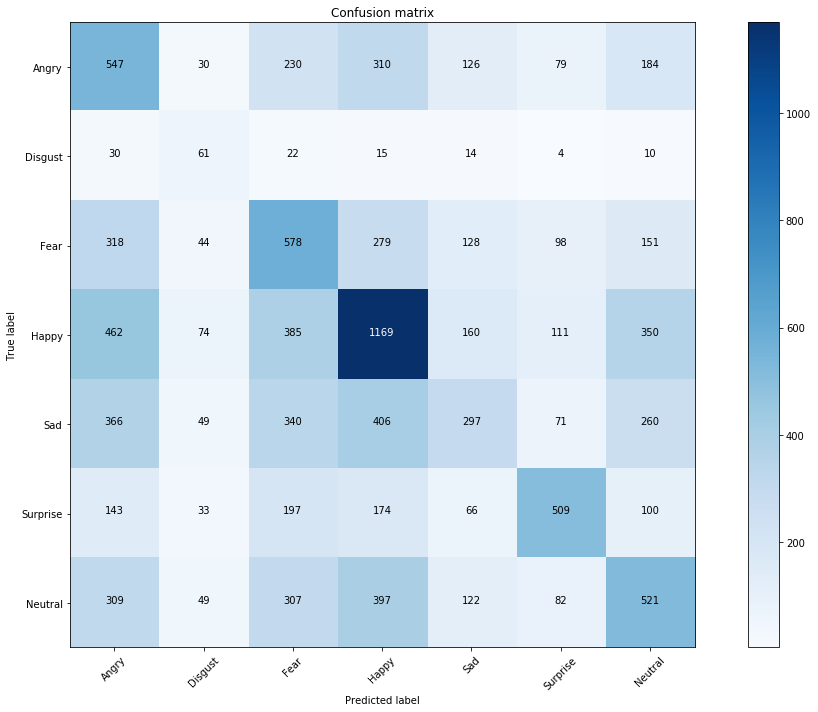

In [413]:
# Compute confusion matrix
cnf_matrix_norm = confusion_matrix(y_test_norm, pred_norm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_norm, classes=classes,
                      title='Confusion matrix')

plt.show()

**Result:** Normalizing the dataset slightly improves the classifier's performance

<hr>

Evaluate the classifier using different metrics

In [461]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_norm = cnf_matrix_norm.sum(axis=0) - np.diag(cnf_matrix_norm)
FN_norm = cnf_matrix_norm.sum(axis=1) - np.diag(cnf_matrix_norm)
TP_norm = np.diag(cnf_matrix_norm)
TN_norm = cnf_matrix_norm.ravel().sum() - (FP_norm + FN_norm + TP_norm)

# True positive rate (sensitivity)
TPR_norm = TP_norm / (TP_norm + FN_norm)
# True negative rate (specificity)
TNR_norm = TN_norm / (TN_norm + FP_norm)
# False positive rate
FPR_norm = FP_norm / (FP_norm + TN_norm)

In [462]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_norm[0], FPR_norm[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_norm[1], FPR_norm[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_norm[2], FPR_norm[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_norm[3], FPR_norm[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_norm[4], FPR_norm[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_norm[5], FPR_norm[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_norm[6], FPR_norm[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.363 			 0.176
Disgust 		 0.391 			 0.026
Fear 			 0.362 			 0.161
Happy 			 0.431 			 0.196
Sad 			 0.166 			 0.069
Surprise 		 0.417 			 0.047
Neutral 		 0.292 			 0.117


In [463]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_norm, pred_norm, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.25      0.36      0.30      1506
    Disgust       0.18      0.39      0.25       156
       Fear       0.28      0.36      0.32      1596
      Happy       0.43      0.43      0.43      2711
        Sad       0.33      0.17      0.22      1789
   Surprise       0.53      0.42      0.47      1222
    Neutral       0.33      0.29      0.31      1787

avg / total       0.36      0.34      0.34     10767



<hr>

<a id='section4'></a>
[Top](#toc)
## 4. Deeper analysis

Selecting best 10 attributes according to their correlation values to the class/target column

#### 1. Angry

In [112]:
# Splitting the dataset into features and labels after normalizing
X_angry = angry_dataset_shuffled.iloc[:, 1:]
y_angry = angry_dataset_shuffled.iloc[:, 0]

<a id='section4a'></a>
[Top](#toc)
- Using the absolute correlation values

In [113]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
angry_corr = X_angry.astype('int64')

angry_corr_scores = np.absolute(angry_corr.apply(lambda x: x.corr(y_angry)))
pd.DataFrame(angry_corr_scores)

,0
pixel0,0.017998
pixel1,0.014695
pixel2,0.009774
pixel3,0.000793
pixel4,0.005163
pixel5,0.010362
pixel6,0.015677
pixel7,0.018816
pixel8,0.021487
pixel9,0.023909


In [114]:
# Select the 10 attributes (pixels) with the highest correlation scores
angry_corr_scores.sort_values(ascending=False, inplace=True)
angry_corr_best_10 = angry_corr_scores.iloc[:10]
pd.DataFrame(angry_corr_best_10)

,0
pixel1361,0.091403
pixel1313,0.087616
pixel1362,0.086043
pixel1408,0.085662
pixel1314,0.085415
pixel1409,0.085100
pixel1360,0.084972
pixel1422,0.082514
pixel1374,0.081761
pixel1456,0.081393


In [137]:
# Extract the selected attributes from the angry dataset
select_angry_corr = X_angry[['pixel1361','pixel1313', 'pixel1362', 'pixel1408', 'pixel1314',
                            'pixel1409', 'pixel1360', 'pixel1422', 'pixel1374', 'pixel1456']]
select_angry_corr.head(5)

,pixel1361,pixel1313,pixel1362,pixel1408,pixel1314,pixel1409,pixel1360,pixel1422,pixel1374,pixel1456
19098,106,120,101,98,122,92,108,154,162,88
2043,208,210,190,203,210,177,217,158,174,176
16564,180,167,200,184,183,197,176,209,214,179
10650,162,176,155,181,155,161,187,225,226,175
4955,193,179,204,201,205,196,190,224,222,206


Show important attributes (pixels) on the image

Label is: 0 => Angry


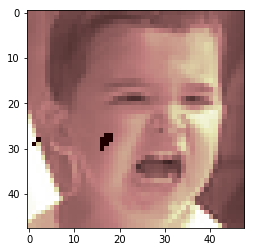

In [279]:
# Randomly select an image from the dataset
angry_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 0)
index_angry_corr = int(np.random.choice(angry_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_angry_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
angry_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_angry_corr.columns:
    px = int(pixel[-4:])
    row = int(px / 48)
    col = int(px % row)
    angry_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in angry_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_angry_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_angry_corr, 0]]))

<hr>

<a id='section4b'></a>
[Top](#toc)
- Using chi-squared statistic

In [115]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
angry_chi2 = SelectKBest(chi2, k=10)
angry_chi2 = angry_chi2.fit(X_angry, y_angry)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_angry_chi2 = angry_chi2.get_support(indices=True)
print(indexes_angry_chi2)

[1313 1361 1362 1408 1409 1422 1608 1652 1655 1656]


In [116]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_angry = [X_angry.columns[i] for i in indexes_angry_chi2]

# Reformat the dataset with the selected features for better visibility
select_angry_chi2 = X_angry[col_names_angry]
select_angry_chi2.head(5)

,pixel1313,pixel1361,pixel1362,pixel1408,pixel1409,pixel1422,pixel1608,pixel1652,pixel1655,pixel1656
19098,120,106,101,98,92,154,115,90,95,98
2043,210,208,190,203,177,158,186,189,166,159
16564,167,180,200,184,197,209,61,156,110,118
10650,176,162,155,181,161,225,208,173,203,212
4955,179,193,204,201,196,224,203,211,207,203


Label is: 0 => Angry


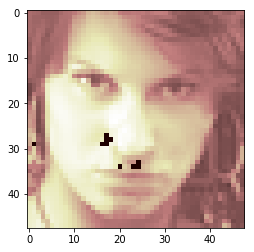

In [281]:
# Randomly select an image from the dataset
angry_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 0)
index_angry_chi2 = int(np.random.choice(angry_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_angry_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
angry_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_angry_chi2.columns:
    px = int(pixel[-4:])
    row = int(px / 48)
    col = int(px % row)
    angry_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in angry_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_angry_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_angry_chi2, 0]]))

<hr>

#### 2. Disgust

In [124]:
# Splitting the dataset into features and labels after normalizing
X_disgust = disgust_dataset_shuffled.iloc[:, 1:]
y_disgust = disgust_dataset_shuffled.iloc[:, 0]

<a id='section4c'></a>
[Top](#toc)
- Using the absolute correlation values

In [125]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
disgust_corr = X_disgust.astype('int64')

disgust_corr_scores = np.absolute(disgust_corr.apply(lambda x: x.corr(y_disgust)))
pd.DataFrame(disgust_corr_scores)

,0
pixel0,0.016037
pixel1,0.018163
pixel2,0.022751
pixel3,0.021984
pixel4,0.019016
pixel5,0.014125
pixel6,0.006574
pixel7,0.000495
pixel8,0.007393
pixel9,0.013850


In [127]:
# Select the 10 attributes (pixels) with the highest correlation scores
disgust_corr_scores.sort_values(ascending=False, inplace=True)
disgust_corr_best_10 = disgust_corr_scores.iloc[:10]
pd.DataFrame(disgust_corr_best_10)

,0
pixel23,0.044831
pixel24,0.044443
pixel29,0.044239
pixel25,0.044218
pixel26,0.043655
pixel28,0.043537
pixel30,0.043349
pixel18,0.042716
pixel77,0.042590
pixel78,0.042522


In [164]:
# Extract the selected attributes from the angry dataset
select_disgust_corr = X_disgust[['pixel23','pixel24', 'pixel29', 'pixel25', 'pixel26',
                            'pixel28', 'pixel30', 'pixel18', 'pixel77', 'pixel78']]
select_disgust_corr.head(5)

,pixel23,pixel24,pixel29,pixel25,pixel26,pixel28,pixel30,pixel18,pixel77,pixel78
19098,188,189,192,191,195,192,188,187,191,187
2043,145,145,138,136,131,145,135,144,167,161
16564,120,76,33,38,44,30,44,29,67,55
10650,167,163,161,165,165,160,157,109,183,179
4955,56,43,46,38,43,59,48,64,59,47


Label is: 1 => Disgust


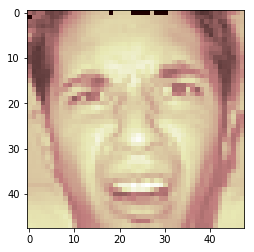

In [282]:
# Randomly select an image from the dataset
disgust_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 1)
index_disgust_corr = int(np.random.choice(disgust_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_disgust_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
disgust_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_disgust_corr.columns:
    px = int(pixel[-2:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    disgust_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in disgust_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_disgust_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_disgust_corr, 0]]))

<hr>

<a id='section4d'></a>
[Top](#toc)
- Using chi-squared statistic

In [195]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
disgust_chi2 = SelectKBest(chi2, k=10)
disgust_chi2 = disgust_chi2.fit(X_disgust, y_disgust)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_disgust_chi2 = disgust_chi2.get_support(indices=True)
print(indexes_disgust_chi2)

[17 18 23 24 25 26 27 28 29 30]


In [197]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_disgust = [X_disgust.columns[i] for i in indexes_disgust_chi2]

# Reformat the dataset with the selected features for better visibility
select_disgust_chi2 = X_disgust[col_names_disgust]
select_disgust_chi2.head(5)

,pixel17,pixel18,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30
19098,181,187,188,189,191,195,195,192,192,188
2043,136,144,145,145,136,131,141,145,138,135
16564,27,29,120,76,38,44,39,30,33,44
10650,108,109,167,163,165,165,163,160,161,157
4955,55,64,56,43,38,43,56,59,46,48


Label is: 1 => Disgust


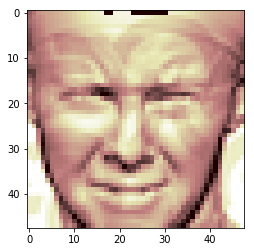

In [283]:
# Randomly select an image from the dataset
disgust_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 1)
index_disgust_chi2 = int(np.random.choice(disgust_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_disgust_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
disgust_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_disgust_chi2.columns:
    px = int(pixel[-2:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    disgust_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in disgust_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_disgust_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_disgust_chi2, 0]]))

<hr>

#### 3. Fear

In [181]:
# Splitting the dataset into features and labels after normalizing
X_fear = fear_dataset_shuffled.iloc[:, 1:]
y_fear = fear_dataset_shuffled.iloc[:, 0]

<a id='section4e'></a>
[Top](#toc)
- Using the absolute correlation values

In [182]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
fear_corr = X_fear.astype('int64')

fear_corr_scores = np.absolute(fear_corr.apply(lambda x: x.corr(y_fear)))
pd.DataFrame(fear_corr_scores)

,0
pixel0,0.053100
pixel1,0.048982
pixel2,0.048522
pixel3,0.045695
pixel4,0.047836
pixel5,0.046293
pixel6,0.038303
pixel7,0.034084
pixel8,0.034984
pixel9,0.034101


In [183]:
# Select the 10 attributes (pixels) with the highest correlation scores
fear_corr_scores.sort_values(ascending=False, inplace=True)
fear_corr_best_10 = fear_corr_scores.iloc[:10]
pd.DataFrame(fear_corr_best_10)

,0
pixel817,0.069051
pixel769,0.067646
pixel865,0.067179
pixel818,0.066182
pixel866,0.066148
pixel910,0.065690
pixel770,0.065507
pixel862,0.065063
pixel913,0.064815
pixel622,0.064700


In [185]:
# Extract the selected attributes from the angry dataset
select_fear_corr = X_fear[['pixel817','pixel769', 'pixel865', 'pixel818', 'pixel866',
                            'pixel910', 'pixel770', 'pixel862', 'pixel913', 'pixel622']]
select_fear_corr.head(5)

,pixel817,pixel769,pixel865,pixel818,pixel866,pixel910,pixel770,pixel862,pixel913,pixel622
19098,132,91,143,120,142,213,96,235,139,134
2043,42,42,43,45,46,100,41,81,46,75
16564,116,126,114,44,51,34,39,36,113,32
10650,1,1,1,0,0,37,0,6,1,4
4955,231,221,244,88,104,205,84,201,253,36


Label is: 2 => Fear


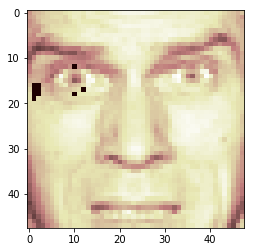

In [284]:
# Randomly select an image from the dataset
fear_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 2)
index_fear_corr = int(np.random.choice(fear_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_fear_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
fear_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_fear_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    fear_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in fear_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_fear_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_fear_corr, 0]]))

<hr>

<a id='section4f'></a>
[Top](#toc)
- Using chi-squared statistic

In [212]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
fear_chi2 = SelectKBest(chi2, k=10)
fear_chi2 = fear_chi2.fit(X_fear, y_fear)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_fear_chi2 = fear_chi2.get_support(indices=True)
print(indexes_fear_chi2)

[622 670 718 721 766 769 817 818 865 910]


In [213]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_fear = [X_fear.columns[i] for i in indexes_fear_chi2]

# Reformat the dataset with the selected features for better visibility
select_fear_chi2 = X_fear[col_names_fear]
select_fear_chi2.head(5)

,pixel622,pixel670,pixel718,pixel721,pixel766,pixel769,pixel817,pixel818,pixel865,pixel910
19098,134,123,147,79,190,91,132,120,143,213
2043,75,72,68,46,81,42,42,45,43,100
16564,32,31,34,113,40,126,116,44,114,34
10650,4,4,1,1,9,1,1,0,1,37
4955,36,34,22,208,51,221,231,88,244,205


Label is: 2 => Fear


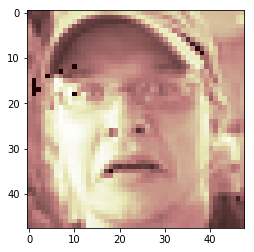

In [285]:
# Randomly select an image from the dataset
fear_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 2)
index_fear_chi2 = int(np.random.choice(fear_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_fear_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
fear_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_fear_chi2.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    fear_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in fear_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_fear_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_fear_chi2, 0]]))

<hr>

#### 4. Happy

In [220]:
# Splitting the dataset into features and labels after normalizing
X_happy = happy_dataset_shuffled.iloc[:, 1:]
y_happy = happy_dataset_shuffled.iloc[:, 0]

<a id='section4g'></a>
[Top](#toc)
- Using the absolute correlation values

In [221]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
happy_corr = X_happy.astype('int64')

happy_corr_scores = np.absolute(happy_corr.apply(lambda x: x.corr(y_happy)))
pd.DataFrame(happy_corr_scores)

,0
pixel0,0.011409
pixel1,0.009841
pixel2,0.009542
pixel3,0.008379
pixel4,0.006346
pixel5,0.007548
pixel6,0.009647
pixel7,0.008249
pixel8,0.009211
pixel9,0.011379


In [222]:
# Select the 10 attributes (pixels) with the highest correlation scores
happy_corr_scores.sort_values(ascending=False, inplace=True)
happy_corr_best_10 = happy_corr_scores.iloc[:10]
pd.DataFrame(happy_corr_best_10)

,0
pixel1896,0.152466
pixel1895,0.151887
pixel1848,0.151871
pixel1944,0.151008
pixel1943,0.150130
pixel1849,0.149782
pixel1897,0.148914
pixel1847,0.148869
pixel1992,0.148671
pixel1991,0.147559


In [223]:
# Extract the selected attributes from the angry dataset
select_happy_corr = X_happy[['pixel1896','pixel1895', 'pixel1848', 'pixel1944', 'pixel1943',
                            'pixel1849', 'pixel1897', 'pixel1847', 'pixel1992', 'pixel1991']]
select_happy_corr.head(5)

,pixel1896,pixel1895,pixel1848,pixel1944,pixel1943,pixel1849,pixel1897,pixel1847,pixel1992,pixel1991
19098,76,82,85,94,83,85,96,121,86,91
2043,223,239,173,226,234,185,236,193,145,147
16564,100,61,162,47,52,167,139,143,126,141
10650,117,111,107,178,183,107,125,95,194,198
4955,225,218,221,222,220,217,225,213,215,218


Label is: 3 => Happy


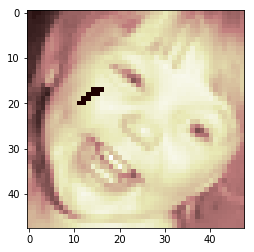

In [286]:
# Randomly select an image from the dataset
happy_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 3)
index_happy_corr = int(np.random.choice(happy_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_happy_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
happy_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_happy_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    happy_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in happy_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_happy_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_happy_corr, 0]]))

<hr>

<a id='section4h'></a>
[Top](#toc)
- Using chi-squared statistic

In [239]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
happy_chi2 = SelectKBest(chi2, k=10)
happy_chi2 = fear_chi2.fit(X_happy, y_happy)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_happy_chi2 = happy_chi2.get_support(indices=True)
print(indexes_happy_chi2)

[1847 1848 1849 1850 1894 1895 1896 1897 1943 1944]


In [240]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_happy = [X_happy.columns[i] for i in indexes_happy_chi2]

# Reformat the dataset with the selected features for better visibility
select_happy_chi2 = X_happy[col_names_happy]
select_happy_chi2.head(5)

,pixel1847,pixel1848,pixel1849,pixel1850,pixel1894,pixel1895,pixel1896,pixel1897,pixel1943,pixel1944
19098,121,85,85,121,115,82,76,96,83,94
2043,193,173,185,197,238,239,223,236,234,226
16564,143,162,167,161,60,61,100,139,52,47
10650,95,107,107,81,102,111,117,125,183,178
4955,213,221,217,220,220,218,225,225,220,222


Label is: 3 => Happy


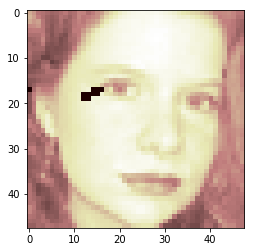

In [287]:
# Randomly select an image from the dataset
happy_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 3)
index_happy_chi2 = int(np.random.choice(happy_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_happy_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
happy_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_happy_chi2.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    happy_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in happy_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_happy_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_happy_chi2, 0]]))

<hr>

#### 5. Neutral

In [242]:
# Splitting the dataset into features and labels after normalizing
X_neutral = neutral_dataset_shuffled.iloc[:, 1:]
y_neutral = neutral_dataset_shuffled.iloc[:, 0]

<a id='section4i'></a>
[Top](#toc)
- Using the absolute correlation values

In [243]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
neutral_corr = X_neutral.astype('int64')

neutral_corr_scores = np.absolute(neutral_corr.apply(lambda x: x.corr(y_neutral)))
pd.DataFrame(neutral_corr_scores)

,0
pixel0,0.062827
pixel1,0.067425
pixel2,0.070837
pixel3,0.076179
pixel4,0.081283
pixel5,0.082725
pixel6,0.080839
pixel7,0.080920
pixel8,0.081377
pixel9,0.082609


In [244]:
# Select the 10 attributes (pixels) with the highest correlation scores
neutral_corr_scores.sort_values(ascending=False, inplace=True)
neutral_corr_best_10 = neutral_corr_scores.iloc[:10]
pd.DataFrame(neutral_corr_best_10)

,0
pixel10,0.085393
pixel11,0.084673
pixel52,0.084654
pixel196,0.084620
pixel88,0.084444
pixel58,0.084302
pixel149,0.084257
pixel244,0.084171
pixel136,0.084000
pixel13,0.083919


In [245]:
# Extract the selected attributes from the angry dataset
select_neutral_corr = X_neutral[['pixel10','pixel11', 'pixel52', 'pixel196', 'pixel88',
                            'pixel58', 'pixel149', 'pixel244', 'pixel136', 'pixel13']]
select_neutral_corr.head(5)

,pixel10,pixel11,pixel52,pixel196,pixel88,pixel58,pixel149,pixel244,pixel136,pixel13
19098,167,168,163,157,144,166,163,154,125,173
2043,34,34,50,41,36,32,38,42,48,72
16564,72,51,35,52,30,45,61,41,34,46
10650,0,1,0,0,1,0,0,0,0,1
4955,72,72,91,58,45,81,62,53,52,61


Label is: 6 => Neutral


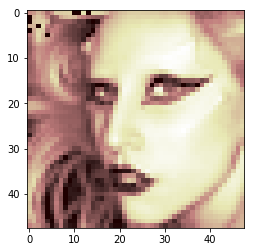

In [288]:
# Randomly select an image from the dataset
neutral_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 6)
index_neutral_corr = int(np.random.choice(neutral_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_neutral_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
neutral_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_neutral_corr.columns:
    try:
        px = int(pixel[-3:])
    except:
        px = int(pixel[-2:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    neutral_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in neutral_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_neutral_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_neutral_corr, 0]]))

<hr>

<a id='section4j'></a>
[Top](#toc)
- Using chi-squared statistic

In [250]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
neutral_chi2 = SelectKBest(chi2, k=10)
neutral_chi2 = neutral_chi2.fit(X_neutral, y_neutral)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_neutral_chi2 = neutral_chi2.get_support(indices=True)
print(indexes_neutral_chi2)

[  5  52  99 100 147 148 195 196 243 244]


In [251]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_neutral = [X_neutral.columns[i] for i in indexes_neutral_chi2]

# Reformat the dataset with the selected features for better visibility
select_neutral_chi2 = X_neutral[col_names_neutral]
select_neutral_chi2.head(5)

,pixel5,pixel52,pixel99,pixel100,pixel147,pixel148,pixel195,pixel196,pixel243,pixel244
19098,163,163,157,162,156,160,155,157,155,154
2043,45,50,49,46,48,42,45,41,44,42
16564,42,35,39,43,46,61,34,52,48,41
10650,0,0,0,0,0,0,0,0,0,0
4955,64,91,189,74,158,61,111,58,84,53


Label is: 6 => Neutral


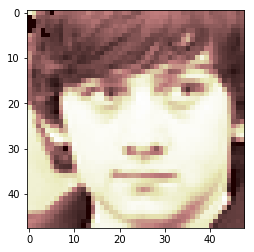

In [289]:
# Randomly select an image from the dataset
neutral_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 6)
index_neutral_chi2 = int(np.random.choice(neutral_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_neutral_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
neutral_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_neutral_chi2.columns:
    if (len(pixel) == 8):
        px = int(pixel[-3:])
    elif (len(pixel) == 7):
        px = int(pixel[-2:])
    elif (len(pixel) == 6):
        px = int(pixel[-1:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    neutral_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in neutral_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_neutral_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_neutral_chi2, 0]]))

<hr>

#### 6. Sad

In [258]:
# Splitting the dataset into features and labels after normalizing
X_sad = sad_dataset_shuffled.iloc[:, 1:]
y_sad = sad_dataset_shuffled.iloc[:, 0]

<a id='section4k'></a>
[Top](#toc)
- Using the absolute correlation values

In [259]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
sad_corr = X_sad.astype('int64')

sad_corr_scores = np.absolute(sad_corr.apply(lambda x: x.corr(y_sad)))
pd.DataFrame(sad_corr_scores)

,0
pixel0,0.070576
pixel1,0.060782
pixel2,0.053108
pixel3,0.045716
pixel4,0.037928
pixel5,0.027017
pixel6,0.017510
pixel7,0.012085
pixel8,0.007977
pixel9,0.006576


In [260]:
# Select the 10 attributes (pixels) with the highest correlation scores
sad_corr_scores.sort_values(ascending=False, inplace=True)
sad_corr_best_10 = sad_corr_scores.iloc[:10]
pd.DataFrame(sad_corr_best_10)

,0
pixel550,0.145291
pixel598,0.145121
pixel599,0.144894
pixel647,0.144263
pixel551,0.143604
pixel646,0.143527
pixel600,0.143201
pixel648,0.142414
pixel552,0.141220
pixel549,0.140919


In [261]:
# Extract the selected attributes from the angry dataset
select_sad_corr = X_sad[['pixel550','pixel598', 'pixel599', 'pixel647', 'pixel551',
                            'pixel646', 'pixel600', 'pixel648', 'pixel552', 'pixel549']]
select_sad_corr.head(5)

,pixel550,pixel598,pixel599,pixel647,pixel551,pixel646,pixel600,pixel648,pixel552,pixel549
19098,127,117,112,102,126,109,102,87,123,126
2043,204,203,204,205,203,202,204,205,203,203
16564,221,205,187,192,204,193,213,208,214,200
10650,199,201,202,200,203,201,202,204,202,195
4955,227,227,227,228,227,228,227,228,228,227


Label is: 4 => Sad


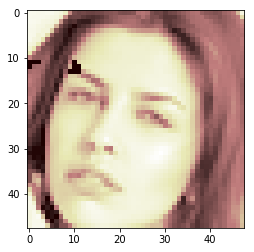

In [290]:
# Randomly select an image from the dataset
sad_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 4)
index_sad_corr = int(np.random.choice(sad_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_sad_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
sad_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_sad_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    sad_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in sad_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_sad_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_sad_corr, 0]]))

<hr>

<a id='section4l'></a>
[Top](#toc)
- Using chi-squared statistic

In [266]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
sad_chi2 = SelectKBest(chi2, k=10)
sad_chi2 = sad_chi2.fit(X_sad, y_sad)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_sad_chi2 = sad_chi2.get_support(indices=True)
print(indexes_sad_chi2)

[549 550 551 597 598 599 600 646 647 648]


In [268]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_sad = [X_sad.columns[i] for i in indexes_sad_chi2]

# Reformat the dataset with the selected features for better visibility
select_sad_chi2 = X_sad[col_names_sad]
select_sad_chi2.head(5)

,pixel549,pixel550,pixel551,pixel597,pixel598,pixel599,pixel600,pixel646,pixel647,pixel648
19098,126,127,126,121,117,112,102,109,102,87
2043,203,204,203,202,203,204,204,202,205,205
16564,200,221,204,182,205,187,213,193,192,208
10650,195,199,203,198,201,202,202,201,200,204
4955,227,227,227,227,227,227,227,228,228,228


Label is: 4 => Sad


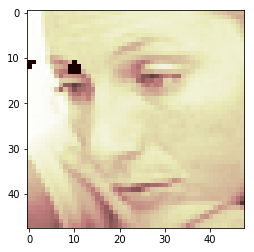

In [292]:
# Randomly select an image from the dataset
sad_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 4)
index_sad_chi2 = int(np.random.choice(sad_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_sad_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
sad_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_sad_chi2.columns:
    if (len(pixel) == 8):
        px = int(pixel[-3:])
    elif (len(pixel) == 7):
        px = int(pixel[-2:])
    elif (len(pixel) == 6):
        px = int(pixel[-1:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    sad_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in sad_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_sad_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_sad_chi2, 0]]))

<hr>

#### 7. Surprise

In [272]:
# Splitting the dataset into features and labels after normalizing
X_surprise = surprise_dataset_shuffled.iloc[:, 1:]
y_surprise = surprise_dataset_shuffled.iloc[:, 0]

<a id='section4m'></a>
[Top](#toc)
- Using the absolute correlation values

In [273]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
surprise_corr = X_surprise.astype('int64')

surprise_corr_scores = np.absolute(surprise_corr.apply(lambda x: x.corr(y_surprise)))
pd.DataFrame(surprise_corr_scores)

,0
pixel0,0.142202
pixel1,0.135681
pixel2,0.127126
pixel3,0.116135
pixel4,0.100126
pixel5,0.084627
pixel6,0.074038
pixel7,0.064244
pixel8,0.054611
pixel9,0.053218


In [274]:
# Select the 10 attributes (pixels) with the highest correlation scores
surprise_corr_scores.sort_values(ascending=False, inplace=True)
surprise_corr_best_10 = surprise_corr_scores.iloc[:10]
pd.DataFrame(surprise_corr_best_10)

,0
pixel1407,0.176709
pixel1455,0.176558
pixel1408,0.176539
pixel839,0.174908
pixel743,0.174841
pixel744,0.174682
pixel791,0.174669
pixel792,0.173828
pixel1360,0.173644
pixel1454,0.173291


In [275]:
# Extract the selected attributes from the angry dataset
select_surprise_corr = X_surprise[['pixel1407','pixel1455', 'pixel1408', 'pixel839', 'pixel743',
                            'pixel744', 'pixel791', 'pixel792', 'pixel1360', 'pixel1454']]
select_surprise_corr.head(5)

,pixel1407,pixel1455,pixel1408,pixel839,pixel743,pixel744,pixel791,pixel792,pixel1360,pixel1454
19098,104,86,98,121,96,116,101,107,108,103
2043,216,203,203,197,197,200,197,201,217,210
16564,189,199,184,191,175,177,183,178,176,191
10650,205,195,181,204,203,202,204,206,187,210
4955,198,208,201,229,229,227,226,225,190,206


Label is: 5 => Surprise


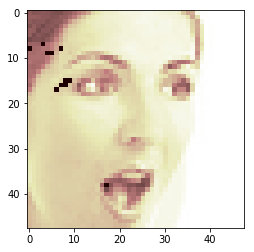

In [293]:
# Randomly select an image from the dataset
surprise_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 5)
index_surprise_corr = int(np.random.choice(surprise_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_surprise_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
surprise_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_surprise_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    surprise_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in surprise_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_surprise_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_surprise_corr, 0]]))

<hr>

<a id='section4n'></a>
[Top](#toc)
- Using chi-squared statistic

In [294]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
surprise_chi2 = SelectKBest(chi2, k=10)
surprise_chi2 = surprise_chi2.fit(X_surprise, y_surprise)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_surprise_chi2 = surprise_chi2.get_support(indices=True)
print(indexes_surprise_chi2)

[  0   1  47  48  49  95  96 143 144 192]


In [295]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_surprise = [X_surprise.columns[i] for i in indexes_surprise_chi2]

# Reformat the dataset with the selected features for better visibility
select_surprise_chi2 = X_sad[col_names_surprise]
select_surprise_chi2.head(5)

,pixel0,pixel1,pixel47,pixel48,pixel49,pixel95,pixel96,pixel143,pixel144,pixel192
19098,142,148,93,142,147,103,141,95,143,145
2043,60,63,51,52,68,51,56,49,68,69
16564,133,46,69,89,34,75,72,61,89,87
10650,0,0,0,0,0,0,0,0,0,0
4955,255,254,137,255,254,89,254,48,254,254


Label is: 5 => Surprise


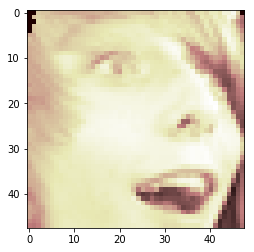

In [301]:
# Randomly select an image from the dataset
surprise_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 5)
index_surprise_chi2 = int(np.random.choice(surprise_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_surprise_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
surprise_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_surprise_chi2.columns:
    if (len(pixel) == 8):
        px = int(pixel[-3:])
    elif (len(pixel) == 7):
        px = int(pixel[-2:])
    elif (len(pixel) == 6):
        px = int(pixel[-1:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    surprise_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in surprise_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_surprise_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_surprise_chi2, 0]]))

<hr>

<a id='section5'></a>
[Top](#toc)
## 5. Improving the Classification using selected attributes

<a id='section5a'></a>
[Top](#toc)
#### Selecting 70 best attributes, 10 from each emotion dataset

Appending the arrays we extracted previously that contained locations of best attributes in each emotion dataset

In [329]:
indexes_70_corr = []
names_70_corr = [select_angry_corr, select_disgust_corr, select_fear_corr, select_happy_corr,
        select_neutral_corr, select_sad_corr, select_surprise_corr]

for i in range(0, 7):
    indexes_70_corr.extend([int(item.replace('pixel','')) for item in names_70_corr[i]])

print(len(np.unique(indexes_70_corr)))

68


We have the best 70 attributes locations, we'll use them to get their names on the main dataset

In [353]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_70 = [features_shuffled.columns[i] for i in np.unique(indexes_70_corr)]

# Reformat the dataset with the selected features for better visibility
main_dataset_best70 = features_shuffled.iloc[:, np.unique(indexes_70_corr)]
main_dataset_best70.columns = col_names_70
main_dataset_best70_labeled = pd.concat([main_dataset_shuffled.iloc[:, 0],
                                         main_dataset_best70], axis=1)

main_dataset_best70_labeled.head(10)

,emotion,pixel10,pixel11,pixel13,pixel18,pixel23,pixel24,pixel25,pixel26,pixel28,...,pixel1847,pixel1848,pixel1849,pixel1895,pixel1896,pixel1897,pixel1943,pixel1944,pixel1991,pixel1992
19098,3,167,168,173,187,188,189,191,195,192,...,121,85,85,82,76,96,83,94,91,86
2043,6,34,34,72,144,145,145,136,131,145,...,193,173,185,239,223,236,234,226,147,145
16564,0,72,51,46,29,120,76,38,44,30,...,143,162,167,61,100,139,52,47,141,126
10650,4,0,1,1,109,167,163,165,165,160,...,95,107,107,111,117,125,183,178,198,194
4955,0,72,72,61,64,56,43,38,43,59,...,213,221,217,218,225,225,220,222,218,215
25499,6,71,58,83,177,219,224,230,227,220,...,160,177,162,120,143,156,91,91,120,108
26653,4,192,191,189,195,170,167,164,156,140,...,185,175,159,165,149,126,132,119,112,98
7646,2,48,23,25,23,73,80,85,94,128,...,94,94,95,102,101,111,132,139,133,141
31831,6,0,0,0,193,196,190,191,202,200,...,156,158,159,153,160,159,152,152,143,148
20526,2,236,235,232,219,201,197,194,191,190,...,208,197,205,250,242,241,223,215,201,193


Write the selected attributes (70) to csv as a reduced dataset

In [354]:
main_dataset_best70_labeled.to_csv('generated_data/selected_70/fer2018.csv',
                                  index=False)

In [355]:
main_dataset_best70_labeled.to_pickle('generated_data/selected_70/fer2018.pkl')

<hr>

<a id='section5b'></a>
[Top](#toc)
#### Selecting 35 best attributes, 5 from each emotion dataset

In [341]:
indexes_35_corr = []

names_35_corr = [select_angry_corr.iloc[:, :5], select_disgust_corr.iloc[:, :5], select_fear_corr.iloc[:, :5],
                 select_happy_corr.iloc[:, :5], select_neutral_corr.iloc[:, :5], select_sad_corr.iloc[:, :5],
                 select_surprise_corr.iloc[:, :5]]

for i in range(0, 7):
    indexes_35_corr.extend([int(item.replace('pixel','')) for item in names_35_corr[i]])
    
print(len(np.unique(indexes_35_corr)))

34


We have the best 35 attributes locations, we'll use them to get their names on the main dataset

In [356]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_35 = [features_shuffled.columns[i] for i in np.unique(indexes_35_corr)]

# Reformat the dataset with the selected features for better visibility
main_dataset_best35 = features_shuffled.iloc[:, np.unique(indexes_35_corr)]
main_dataset_best35.columns = col_names_35
main_dataset_best35_labeled = pd.concat([main_dataset_shuffled.iloc[:, 0],
                                         main_dataset_best35], axis=1)

main_dataset_best35_labeled.head(10)

,emotion,pixel10,pixel11,pixel23,pixel24,pixel25,pixel26,pixel29,pixel52,pixel88,...,pixel1361,pixel1362,pixel1407,pixel1408,pixel1455,pixel1848,pixel1895,pixel1896,pixel1943,pixel1944
19098,3,167,168,188,189,191,195,192,163,144,...,106,101,104,98,86,85,82,76,83,94
2043,6,34,34,145,145,136,131,138,50,36,...,208,190,216,203,203,173,239,223,234,226
16564,0,72,51,120,76,38,44,33,35,30,...,180,200,189,184,199,162,61,100,52,47
10650,4,0,1,167,163,165,165,161,0,1,...,162,155,205,181,195,107,111,117,183,178
4955,0,72,72,56,43,38,43,46,91,45,...,193,204,198,201,208,221,218,225,220,222
25499,6,71,58,219,224,230,227,216,5,44,...,181,171,160,176,167,177,120,143,91,91
26653,4,192,191,170,167,164,156,126,191,211,...,199,209,192,190,192,175,165,149,132,119
7646,2,48,23,73,80,85,94,134,25,51,...,126,124,133,134,134,94,102,101,132,139
31831,6,0,0,196,190,191,202,208,0,161,...,93,72,144,143,176,158,153,160,152,152
20526,2,236,235,201,197,194,191,188,106,200,...,212,227,215,204,203,197,250,242,223,215


Write the selected attributes (35) to csv as a reduced dataset

In [357]:
main_dataset_best35_labeled.to_csv('generated_data/selected_35/fer2018.csv',
                                  index=False)

In [358]:
main_dataset_best70_labeled.to_pickle('generated_data/selected_35/fer2018.pkl')

<hr>

<a id='section5c'></a>
[Top](#toc)
#### Selecting 14 best attributes, 2 from each emotion dataset

In [348]:
indexes_14_corr = []

names_14_corr = [select_angry_corr.iloc[:, :2], select_disgust_corr.iloc[:, :2], select_fear_corr.iloc[:, :2],
                 select_happy_corr.iloc[:, :2], select_neutral_corr.iloc[:, :2], select_sad_corr.iloc[:, :2],
                 select_surprise_corr.iloc[:, :2]]

for i in range(0, 7):
    indexes_14_corr.extend([int(item.replace('pixel','')) for item in names_14_corr[i]])
    
print(len(np.unique(indexes_14_corr)))

14


We have the best 14 attributes locations, we'll use them to get their names on the main dataset

In [349]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_14 = [features_shuffled.columns[i] for i in indexes_14_corr]

# Reformat the dataset with the selected features for better visibility
main_dataset_best14 = features_shuffled.iloc[:, indexes_14_corr]
main_dataset_best14.columns = col_names_14
main_dataset_best14_labeled = pd.concat([main_dataset_shuffled.iloc[:, 0],
                                         main_dataset_best14], axis=1)

main_dataset_best14_labeled.head(10)

,emotion,pixel1361,pixel1313,pixel23,pixel24,pixel817,pixel769,pixel1896,pixel1895,pixel10,pixel11,pixel550,pixel598,pixel1407,pixel1455
19098,3,106,120,188,189,132,91,76,82,167,168,127,117,104,86
2043,6,208,210,145,145,42,42,223,239,34,34,204,203,216,203
16564,0,180,167,120,76,116,126,100,61,72,51,221,205,189,199
10650,4,162,176,167,163,1,1,117,111,0,1,199,201,205,195
4955,0,193,179,56,43,231,221,225,218,72,72,227,227,198,208
25499,6,181,185,219,224,95,91,143,120,71,58,224,222,160,167
26653,4,199,194,170,167,5,7,149,165,192,191,78,72,192,192
7646,2,126,131,73,80,109,94,101,102,48,23,131,130,133,134
31831,6,93,153,196,190,0,0,160,153,0,0,194,189,144,176
20526,2,212,220,201,197,114,167,242,250,236,235,211,207,215,203


Write the selected attributes (14) to csv as a reduced dataset

In [350]:
main_dataset_best14_labeled.to_csv('generated_data/selected_14/fer2018.csv',
                                  index=False)

In [351]:
main_dataset_best14_labeled.to_pickle('generated_data/selected_14/fer2018.pkl')

<hr>

<a id='section6'></a>
[Top](#toc)
## 6. Experimenting with the classifier and running Nearest neighbor on different selected attributes

<a id='section6a'></a>
[Top](#toc)
#### Running KNN classifier on the full dataset with selected 70 best attributes

Split the class column

In [359]:
features_70 = main_dataset_best70_labeled.iloc[:, 1:]

Create train and test sets of the features and labels 70-30

In [360]:
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(main_dataset_best70_labeled.iloc[:, 1:],
                                                                main_dataset_best70_labeled.iloc[:, 0],
                                                                test_size=0.3,
                                                                random_state=42)

In [361]:
X_train_70.head(10)

,pixel10,pixel11,pixel13,pixel18,pixel23,pixel24,pixel25,pixel26,pixel28,pixel29,...,pixel1847,pixel1848,pixel1849,pixel1895,pixel1896,pixel1897,pixel1943,pixel1944,pixel1991,pixel1992
23996,108,108,103,76,79,80,71,58,43,34,...,89,110,108,158,151,126,149,114,98,89
10815,34,38,41,58,80,76,74,72,62,58,...,64,58,63,99,96,106,113,111,74,78
11819,92,114,124,124,147,144,138,137,138,139,...,87,104,117,108,116,126,104,108,108,115
5442,53,59,51,97,133,153,175,169,132,139,...,107,99,88,141,146,132,107,115,158,147
12212,162,176,195,206,211,213,215,212,196,189,...,162,177,184,179,179,180,188,197,186,189
31218,157,156,162,164,170,176,173,173,171,171,...,18,101,132,2,59,129,36,107,83,128
11407,201,203,207,211,207,206,201,201,202,199,...,179,175,147,122,119,114,45,38,0,6
30806,35,23,52,83,61,61,57,43,33,30,...,152,157,174,170,178,176,169,168,180,192
14120,143,145,127,143,153,146,145,145,158,157,...,90,98,99,163,169,170,118,139,125,131
660,62,34,27,33,17,18,23,34,10,8,...,184,169,166,176,169,169,166,161,174,188


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [362]:
X_train_70 = np.asarray(X_train_70)
X_test_70 = np.asarray(X_test_70)
y_train_70 = np.asarray(y_train_70)
y_test_70 = np.asarray(y_test_70)

In [363]:
print('Training examples: {}'.format(X_train_70.shape))
print('Testing examples: {}'.format(X_test_70.shape))
print('Training labels: {}'.format(y_train_70.shape))
print('Testing labels: {}'.format(y_test_70.shape))

Training examples: (25120, 68)
Testing examples: (10767, 68)
Training labels: (25120,)
Testing labels: (10767,)


In [364]:
y_train_70 = y_train_70.reshape(y_train_70.shape[0], )
y_test_70 = y_test_70.reshape(y_test_70.shape[0], )

In [365]:
y_train_70.shape

(25120,)

Create the classifier

In [491]:
neigh_70_3 = KNeighborsClassifier(n_neighbors=3)
neigh_70_3.fit(X_train_70, y_train_70) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [492]:
neigh_70_3.score(X_test_70, y_test_70)

0.2974830500603696

- Experimenting with different number of neighbors (n=5)

In [487]:
neigh_70_5 = KNeighborsClassifier(n_neighbors=5)
neigh_70_5.fit(X_train_70, y_train_70) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [488]:
neigh_70_5.score(X_test_70, y_test_70)

0.3056561716355531

- Experimenting with different number of neighbors (n=7)

In [493]:
neigh_70_7 = KNeighborsClassifier(n_neighbors=7)
neigh_70_7.fit(X_train_70, y_train_70) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [494]:
neigh_70_7.score(X_test_70, y_test_70)

0.3070493173585957

In [495]:
# Predict on the test split and return the resulting array
pred_70_7 = neigh_70.predict(X_test_70)

Create confusion matrix for classifier with 7 neighbors

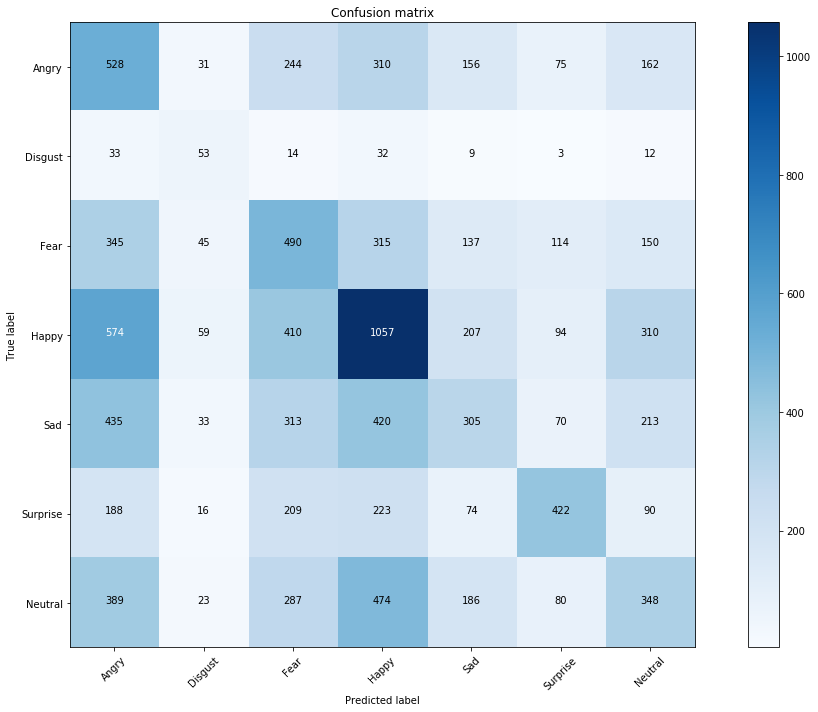

In [497]:
# Compute confusion matrix
cnf_matrix_70 = confusion_matrix(y_test_70, pred_70_7)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_70, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [464]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_70 = cnf_matrix_70.sum(axis=0) - np.diag(cnf_matrix_70)
FN_70 = cnf_matrix_70.sum(axis=1) - np.diag(cnf_matrix_70)
TP_70 = np.diag(cnf_matrix_70)
TN_70 = cnf_matrix_70.ravel().sum() - (FP_70 + FN_70 + TP_70)

# True positive rate (sensitivity)
TPR_70 = TP_70 / (TP_70 + FN_70)
# True negative rate (specificity)
TNR_70 = TN_70 / (TN_70 + FP_70)
# False positive rate
FPR_70 = FP_70 / (FP_70 + TN_70)

In [465]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[0], FPR_70[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[1], FPR_70[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[2], FPR_70[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[3], FPR_70[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[4], FPR_70[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[5], FPR_70[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[6], FPR_70[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.351 			 0.212
Disgust 		 0.340 			 0.020
Fear 			 0.307 			 0.161
Happy 			 0.390 			 0.220
Sad 			 0.170 			 0.086
Surprise 		 0.345 			 0.046
Neutral 		 0.195 			 0.104


In [526]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_70, pred_70_7, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.21      0.35      0.26      1506
    Disgust       0.20      0.34      0.25       156
       Fear       0.25      0.31      0.28      1596
      Happy       0.37      0.39      0.38      2711
        Sad       0.28      0.17      0.21      1789
   Surprise       0.49      0.35      0.41      1222
    Neutral       0.27      0.19      0.23      1787

avg / total       0.31      0.30      0.30     10767



<hr>

<a id='section6b'></a>
[Top](#toc)
#### Trying splitting the dataset using stratified K fold

In [511]:
rskf_70 = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

history_70 = {
    'Iteration1': {'preds': [], 'acc': []},
    'Iteration2': {'preds': [], 'acc': []},
    'Iteration3': {'preds': [], 'acc': []},
    'Iteration4': {'preds': [], 'acc': []},
    'Iteration5': {'preds': [], 'acc': []},
    'Iteration6': {'preds': [], 'acc': []},
    'Iteration7': {'preds': [], 'acc': []},
    'Iteration8': {'preds': [], 'acc': []},
    'Iteration9': {'preds': [], 'acc': []},
    'Iteration10': {'preds': [], 'acc': []}
}

i = 0

for train_index_70, test_index_70 in rskf_70.split(main_dataset_best70_labeled.iloc[:, 1:],
                                                   main_dataset_best70_labeled.iloc[:, 0]):
    
    # Get the training and testing splits
    X_train_cv_70, X_test_cv_70 = main_dataset_best70_labeled.iloc[train_index_70, 1:], main_dataset_best70_labeled.iloc[test_index_70, 1:]
    y_train_cv_70, y_test_cv_70 = main_dataset_best70_labeled.iloc[train_index_70, 0], main_dataset_best70_labeled.iloc[test_index_70, 0]
    
    # Start training
    neigh_70_cv = KNeighborsClassifier(n_neighbors=7)
    neigh_70_cv.fit(X_train_cv_70, y_train_cv_70)
    
    # Start predicting on the test splits and save the ouputs into a dictionary
    pred_70_cv = neigh_70_cv.predict(X_test_cv_70)
    score_70_cv = neigh_70_cv.score(X_test_cv_70, y_test_cv_70)
    
    if (i == 0):
        j = 0
        history_70['Iteration1']['preds'].append(pred_70_cv)      
        history_70['Iteration1']['acc'].append(score_70_cv)
        print('Iteration number: {} =======> Accuracy: {}'.format(int(i/10)+1,
                                                                              history_70['Iteration'+str(int(i/10)+1)]['acc'][0]))
    elif (i % 10 == 0):
        j = 0
        history_70['Iteration'+str(int(i/10)+1)]['preds'].append(pred_70_cv)      
        history_70['Iteration'+str(int(i/10)+1)]['acc'].append(score_70_cv)
        print('Iteration number: {} =======> Accuracy: {}'.format(int(i/10)+1,
                                                                              history_70['Iteration'+str(int(i/10)+1)]['acc'][0]))
    else:
        j += 1
        history_70['Iteration'+str(int(i/10)+1)]['preds'].append(pred_70_cv)      
        history_70['Iteration'+str(int(i/10)+1)]['acc'].append(score_70_cv)
    i += 1

Iteration number: 1 =======> Accuracy: 0.31542316258351893
Iteration number: 2 =======> Accuracy: 0.3237750556792873
Iteration number: 3 =======> Accuracy: 0.30818485523385303
Iteration number: 4 =======> Accuracy: 0.311804008908686
Iteration number: 5 =======> Accuracy: 0.3126391982182628
Iteration number: 6 =======> Accuracy: 0.31792873051224946
Iteration number: 7 =======> Accuracy: 0.311804008908686
Iteration number: 8 =======> Accuracy: 0.3134743875278396
Iteration number: 9 =======> Accuracy: 0.30957683741648107
Iteration number: 10 =======> Accuracy: 0.31681514476614697


In [512]:
print(history_70)

{'Iteration2': {'acc': [0.3237750556792873, 0.3188526872737399, 0.30250696378830083, 0.3089997213708554, 0.31540819169685147, 0.3162440791306771, 0.32265254945667315, 0.31948703652076943, 0.31344116006692696, 0.32217573221757323], 'preds': [array([0, 4, 3, ..., 6, 2, 4]), array([3, 3, 2, ..., 3, 6, 2]), array([2, 5, 6, ..., 3, 2, 6]), array([4, 3, 5, ..., 3, 5, 5]), array([4, 4, 0, ..., 3, 2, 4]), array([3, 3, 2, ..., 3, 4, 3]), array([3, 4, 3, ..., 3, 2, 4]), array([3, 6, 2, ..., 3, 5, 3]), array([6, 5, 3, ..., 6, 3, 0]), array([6, 3, 2, ..., 0, 3, 3])]}, 'Iteration1': {'acc': [0.31542316258351893, 0.29991645781119464, 0.3128133704735376, 0.3148509334076344, 0.32432432432432434, 0.31958762886597936, 0.310392867093898, 0.3189294675216058, 0.3109313998884551, 0.31492329149232917], 'preds': [array([3, 3, 3, ..., 3, 3, 2]), array([0, 6, 2, ..., 2, 3, 3]), array([2, 0, 5, ..., 6, 4, 4]), array([6, 3, 0, ..., 2, 3, 5]), array([3, 3, 0, ..., 6, 6, 6]), array([5, 6, 3, ..., 4, 4, 4]), array([

<hr>

<a id='section6c'></a>
[Top](#toc)
#### Running classifier on best 35 attributes

Create train and test sets of the features and labels 70-30

In [368]:
X_train_35, X_test_35, y_train_35, y_test_35 = train_test_split(main_dataset_best35_labeled.iloc[:, 1:],
                                                                main_dataset_best35_labeled.iloc[:, 0],
                                                                test_size=0.3,
                                                                random_state=42)

In [369]:
X_train_35.head(10)

,pixel10,pixel11,pixel23,pixel24,pixel25,pixel26,pixel29,pixel52,pixel88,pixel196,...,pixel1361,pixel1362,pixel1407,pixel1408,pixel1455,pixel1848,pixel1895,pixel1896,pixel1943,pixel1944
23996,108,108,79,80,71,58,34,44,60,95,...,179,160,186,194,154,110,158,151,149,114
10815,34,38,80,76,74,72,58,162,35,169,...,99,66,99,116,100,58,99,96,113,111
11819,92,114,147,144,138,137,139,116,146,137,...,93,85,118,92,39,104,108,116,104,108
5442,53,59,133,153,175,169,139,99,57,71,...,129,142,126,126,131,99,141,146,107,115
12212,162,176,211,213,215,212,189,104,160,62,...,213,211,208,211,206,177,179,179,188,197
31218,157,156,170,176,173,173,171,254,167,255,...,137,139,105,97,113,101,2,59,36,107
11407,201,203,207,206,201,201,199,173,106,168,...,195,207,201,183,184,175,122,119,45,38
30806,35,23,61,61,57,43,30,51,58,224,...,196,204,112,135,122,157,170,178,169,168
14120,143,145,153,146,145,145,157,129,172,135,...,103,57,171,158,168,98,163,169,118,139
660,62,34,17,18,23,34,8,95,115,48,...,140,154,159,142,151,169,176,169,166,161


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [370]:
X_train_35 = np.asarray(X_train_35)
X_test_35 = np.asarray(X_test_35)
y_train_35 = np.asarray(y_train_35)
y_test_35 = np.asarray(y_test_35)

In [371]:
print('Training examples: {}'.format(X_train_35.shape))
print('Testing examples: {}'.format(X_test_35.shape))
print('Training labels: {}'.format(y_train_35.shape))
print('Testing labels: {}'.format(y_test_35.shape))

Training examples: (25120, 34)
Testing examples: (10767, 34)
Training labels: (25120,)
Testing labels: (10767,)


In [372]:
y_train_35 = y_train_35.reshape(y_train_35.shape[0], )
y_test_35 = y_test_35.reshape(y_test_35.shape[0], )

In [373]:
y_train_35.shape

(25120,)

Create the classifier

In [513]:
neigh_35_3 = KNeighborsClassifier(n_neighbors=3)
neigh_35_3.fit(X_train_35, y_train_35) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [514]:
neigh_35_3.score(X_test_35, y_test_35)

0.2908888269713012

- Experimenting with different number of neighbors (n=5)

In [520]:
neigh_35_5 = KNeighborsClassifier(n_neighbors=5)
neigh_35_5.fit(X_train_35, y_train_35) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [521]:
neigh_35_5.score(X_test_35, y_test_35)

0.29525401690350145

- Experimenting with different number of neighbors (n=7)

In [522]:
neigh_35_7 = KNeighborsClassifier(n_neighbors=7)
neigh_35_7.fit(X_train_35, y_train_35)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [523]:
neigh_35_7.score(X_test_35, y_test_35)

0.29618278071886317

In [524]:
# Predict on the test split and return the resulting array
pred_35_7 = neigh_35_7.predict(X_test_35)

Create confusion matrix

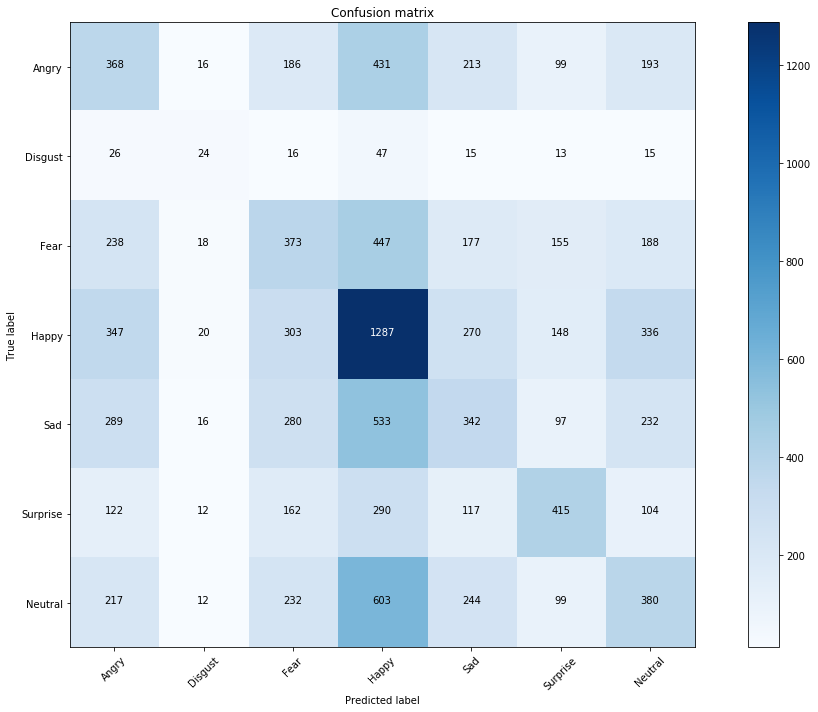

In [525]:
# Compute confusion matrix
cnf_matrix_35 = confusion_matrix(y_test_35, pred_35_7)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_35, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [469]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_35 = cnf_matrix_35.sum(axis=0) - np.diag(cnf_matrix_35)
FN_35 = cnf_matrix_35.sum(axis=1) - np.diag(cnf_matrix_35)
TP_35 = np.diag(cnf_matrix_35)
TN_35 = cnf_matrix_35.ravel().sum() - (FP_35 + FN_35 + TP_35)

# True positive rate (sensitivity)
TPR_35 = TP_35 / (TP_35 + FN_35)
# True negative rate (specificity)
TNR_35 = TN_35 / (TN_35 + FP_35)
# False positive rate
FPR_35 = FP_35 / (FP_35 + TN_35)

In [470]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[0], FPR_35[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[1], FPR_35[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[2], FPR_35[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[3], FPR_35[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[4], FPR_35[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[5], FPR_35[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[6], FPR_35[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.355 			 0.214
Disgust 		 0.346 			 0.020
Fear 			 0.293 			 0.163
Happy 			 0.379 			 0.219
Sad 			 0.174 			 0.087
Surprise 		 0.334 			 0.053
Neutral 		 0.185 			 0.100


In [527]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_35, pred_35_7, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.23      0.24      0.24      1506
    Disgust       0.20      0.15      0.18       156
       Fear       0.24      0.23      0.24      1596
      Happy       0.35      0.47      0.41      2711
        Sad       0.25      0.19      0.22      1789
   Surprise       0.40      0.34      0.37      1222
    Neutral       0.26      0.21      0.23      1787

avg / total       0.29      0.30      0.29     10767



<hr>

<a id='section6d'></a>
[Top](#toc)
#### Trying splitting the dataset using stratified K fold

In [528]:
rskf_35 = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

history_35 = {
    'Iteration1': {'preds': [], 'acc': []},
    'Iteration2': {'preds': [], 'acc': []},
    'Iteration3': {'preds': [], 'acc': []},
    'Iteration4': {'preds': [], 'acc': []},
    'Iteration5': {'preds': [], 'acc': []},
    'Iteration6': {'preds': [], 'acc': []},
    'Iteration7': {'preds': [], 'acc': []},
    'Iteration8': {'preds': [], 'acc': []},
    'Iteration9': {'preds': [], 'acc': []},
    'Iteration10': {'preds': [], 'acc': []}
}

i = 0

for train_index_35, test_index_35 in rskf_35.split(main_dataset_best35_labeled.iloc[:, 1:],
                                                   main_dataset_best35_labeled.iloc[:, 0]):
    
    # Get the training and testing splits
    X_train_cv_35, X_test_cv_35 = main_dataset_best35_labeled.iloc[train_index_35, 1:], main_dataset_best35_labeled.iloc[test_index_35, 1:]
    y_train_cv_35, y_test_cv_35 = main_dataset_best35_labeled.iloc[train_index_35, 0], main_dataset_best35_labeled.iloc[test_index_35, 0]
    
    # Start training
    neigh_35_cv = KNeighborsClassifier(n_neighbors=7)
    neigh_35_cv.fit(X_train_cv_35, y_train_cv_35)
    
    # Start predicting on the test splits and save the ouputs into a dictionary
    pred_35_cv = neigh_35_cv.predict(X_test_cv_35)
    score_35_cv = neigh_35_cv.score(X_test_cv_35, y_test_cv_35)
    
    if (i == 0):
        j = 0
        history_35['Iteration1']['preds'].append(pred_35_cv)      
        history_35['Iteration1']['acc'].append(score_35_cv)
        print('Iteration number: {} =======> Accuracy: {}'.format(int(i/10)+1,
                                                                              history_35['Iteration'+str(int(i/10)+1)]['acc'][0]))
    elif (i % 10 == 0):
        j = 0
        history_35['Iteration'+str(int(i/10)+1)]['preds'].append(pred_35_cv)      
        history_35['Iteration'+str(int(i/10)+1)]['acc'].append(score_35_cv)
        print('Iteration number: {} =======> Accuracy: {}'.format(int(i/10)+1,
                                                                              history_35['Iteration'+str(int(i/10)+1)]['acc'][0]))
    else:
        j += 1
        history_35['Iteration'+str(int(i/10)+1)]['preds'].append(pred_35_cv)      
        history_35['Iteration'+str(int(i/10)+1)]['acc'].append(score_35_cv)
    i += 1

Iteration number: 1 =======> Accuracy: 0.30233853006681516
Iteration number: 2 =======> Accuracy: 0.30707126948775054
Iteration number: 3 =======> Accuracy: 0.2970489977728285
Iteration number: 4 =======> Accuracy: 0.2942650334075724
Iteration number: 5 =======> Accuracy: 0.2948218262806236
Iteration number: 6 =======> Accuracy: 0.2942650334075724
Iteration number: 7 =======> Accuracy: 0.30094654788418707
Iteration number: 8 =======> Accuracy: 0.2970489977728285
Iteration number: 9 =======> Accuracy: 0.30233853006681516
Iteration number: 10 =======> Accuracy: 0.3054008908685969


<hr>

<a id='section6e'></a>
[Top](#toc)
#### Running the classifier on 14 best attributes

Create train and test sets of the features and labels 70-30

In [376]:
X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(main_dataset_best14_labeled.iloc[:, 1:],
                                                                main_dataset_best14_labeled.iloc[:, 0],
                                                                test_size=0.3,
                                                                random_state=42)

In [377]:
X_train_14.head(10)

,pixel1361,pixel1313,pixel23,pixel24,pixel817,pixel769,pixel1896,pixel1895,pixel10,pixel11,pixel550,pixel598,pixel1407,pixel1455
23996,179,161,79,80,87,84,151,158,108,108,93,68,186,154
10815,99,98,80,76,168,167,96,99,34,38,123,117,99,100
11819,93,80,147,144,126,118,116,108,92,114,126,132,118,39
5442,129,127,133,153,35,38,146,141,53,59,138,136,126,131
12212,213,208,211,213,164,158,179,179,162,176,218,216,208,206
31218,137,142,170,176,255,254,59,2,157,156,138,135,105,113
11407,195,206,207,206,48,46,119,122,201,203,212,208,201,184
30806,196,187,61,61,217,216,178,170,35,23,124,123,112,122
14120,103,125,153,146,134,134,169,163,143,145,172,172,171,168
660,140,157,17,18,17,18,169,176,62,34,170,113,159,151


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [378]:
X_train_14 = np.asarray(X_train_14)
X_test_14 = np.asarray(X_test_14)
y_train_14 = np.asarray(y_train_14)
y_test_14 = np.asarray(y_test_14)

In [379]:
print('Training examples: {}'.format(X_train_14.shape))
print('Testing examples: {}'.format(X_test_14.shape))
print('Training labels: {}'.format(y_train_14.shape))
print('Testing labels: {}'.format(y_test_14.shape))

Training examples: (25120, 14)
Testing examples: (10767, 14)
Training labels: (25120,)
Testing labels: (10767,)


In [380]:
y_train_14 = y_train_14.reshape(y_train_14.shape[0], )
y_test_14 = y_test_14.reshape(y_test_14.shape[0], )

In [381]:
y_train_14.shape

(25120,)

Create the classifier

In [529]:
neigh_14_3 = KNeighborsClassifier(n_neighbors=3)
neigh_14_3.fit(X_train_14, y_train_14) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [530]:
neigh_14_3.score(X_test_14, y_test_14)

0.2627472833658401

- Experimenting with different number of neighbors (n=5)

In [531]:
neigh_14_5 = KNeighborsClassifier(n_neighbors=5)
neigh_14_5.fit(X_train_14, y_train_14) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [532]:
neigh_14_5.score(X_test_14, y_test_14)

0.2733351908609641

- Experimenting with different number of neighbors (n=7)

In [533]:
neigh_14_7 = KNeighborsClassifier(n_neighbors=7)
neigh_14_7.fit(X_train_14, y_train_14) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [534]:
neigh_14_7.score(X_test_14, y_test_14)

0.27862914460852606

In [535]:
# Predict on the test split and return the resulting array
pred_14_7 = neigh_14_7.predict(X_test_14)

Create confusion matrix

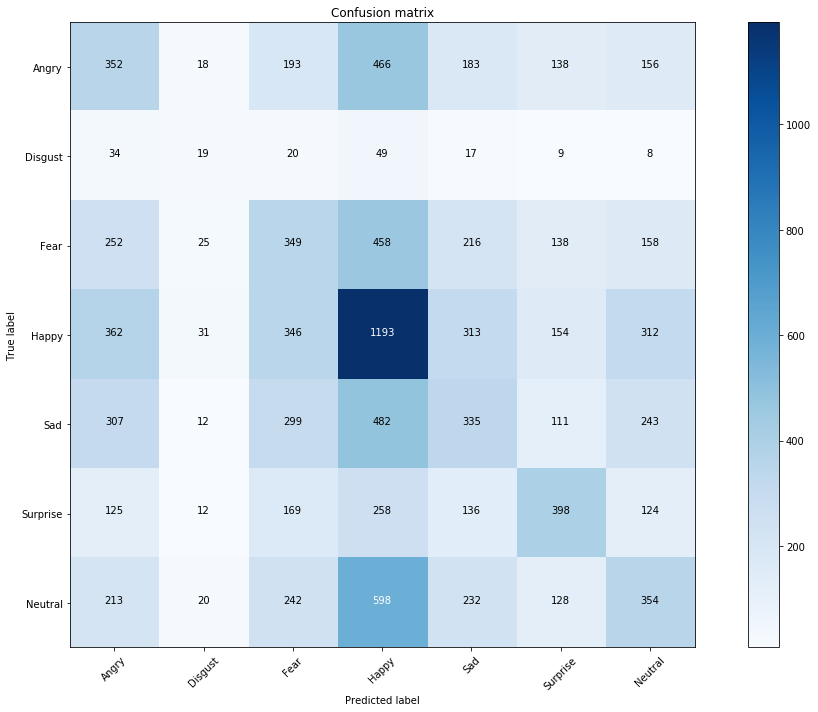

In [536]:
# Compute confusion matrix
cnf_matrix_14 = confusion_matrix(y_test_14, pred_14_7)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_14, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [472]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_14 = cnf_matrix_14.sum(axis=0) - np.diag(cnf_matrix_14)
FN_14 = cnf_matrix_14.sum(axis=1) - np.diag(cnf_matrix_14)
TP_14 = np.diag(cnf_matrix_14)
TN_14 = cnf_matrix_14.ravel().sum() - (FP_14 + FN_14 + TP_14)

# True positive rate (sensitivity)
TPR_14 = TP_14 / (TP_14 + FN_14)
# True negative rate (specificity)
TNR_14 = TN_14 / (TN_14 + FP_14)
# False positive rate
FPR_14 = FP_14 / (FP_14 + TN_14)

In [473]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[0], FPR_14[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[1], FPR_14[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[2], FPR_14[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[3], FPR_14[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[4], FPR_14[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[5], FPR_14[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[6], FPR_14[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.330 			 0.236
Disgust 		 0.269 			 0.023
Fear 			 0.289 			 0.174
Happy 			 0.333 			 0.218
Sad 			 0.157 			 0.088
Surprise 		 0.301 			 0.054
Neutral 		 0.156 			 0.094


In [537]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_14, pred_14_7, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.21      0.23      0.22      1506
    Disgust       0.14      0.12      0.13       156
       Fear       0.22      0.22      0.22      1596
      Happy       0.34      0.44      0.38      2711
        Sad       0.23      0.19      0.21      1789
   Surprise       0.37      0.33      0.35      1222
    Neutral       0.26      0.20      0.23      1787

avg / total       0.27      0.28      0.27     10767



<hr>

<a id='section6f'></a>
[Top](#toc)
#### Trying splitting the dataset using stratified K fold

In [539]:
rskf_14 = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

history_14 = {
    'Iteration1': {'preds': [], 'acc': []},
    'Iteration2': {'preds': [], 'acc': []},
    'Iteration3': {'preds': [], 'acc': []},
    'Iteration4': {'preds': [], 'acc': []},
    'Iteration5': {'preds': [], 'acc': []},
    'Iteration6': {'preds': [], 'acc': []},
    'Iteration7': {'preds': [], 'acc': []},
    'Iteration8': {'preds': [], 'acc': []},
    'Iteration9': {'preds': [], 'acc': []},
    'Iteration10': {'preds': [], 'acc': []}
}

i = 0

for train_index_14, test_index_14 in rskf_14.split(main_dataset_best14_labeled.iloc[:, 1:],
                                                   main_dataset_best14_labeled.iloc[:, 0]):
    
    # Get the training and testing splits
    X_train_cv_14, X_test_cv_14 = main_dataset_best14_labeled.iloc[train_index_14, 1:], main_dataset_best14_labeled.iloc[test_index_14, 1:]
    y_train_cv_14, y_test_cv_14 = main_dataset_best14_labeled.iloc[train_index_14, 0], main_dataset_best14_labeled.iloc[test_index_14, 0]
    
    # Start training
    neigh_14_cv = KNeighborsClassifier(n_neighbors=7)
    neigh_14_cv.fit(X_train_cv_14, y_train_cv_14)
    
    # Start predicting on the test splits and save the ouputs into a dictionary
    pred_14_cv = neigh_14_cv.predict(X_test_cv_14)
    score_14_cv = neigh_14_cv.score(X_test_cv_14, y_test_cv_14)
    
    if (i == 0):
        j = 0
        history_14['Iteration1']['preds'].append(pred_14_cv)      
        history_14['Iteration1']['acc'].append(score_14_cv)
        print('Iteration number: {} =======> Accuracy: {}'.format(int(i/10)+1,
                                                                              history_14['Iteration'+str(int(i/10)+1)]['acc'][0]))
    elif (i % 10 == 0):
        j = 0
        history_14['Iteration'+str(int(i/10)+1)]['preds'].append(pred_14_cv)      
        history_14['Iteration'+str(int(i/10)+1)]['acc'].append(score_14_cv)
        print('Iteration number: {} =======> Accuracy: {}'.format(int(i/10)+1,
                                                                              history_14['Iteration'+str(int(i/10)+1)]['acc'][0]))
    else:
        j += 1
        history_14['Iteration'+str(int(i/10)+1)]['preds'].append(pred_14_cv)      
        history_14['Iteration'+str(int(i/10)+1)]['acc'].append(score_14_cv)
    i += 1

Iteration number: 1 =======> Accuracy: 0.2817371937639198
Iteration number: 2 =======> Accuracy: 0.29370824053452116
Iteration number: 3 =======> Accuracy: 0.272271714922049
Iteration number: 4 =======> Accuracy: 0.2803452115812918
Iteration number: 5 =======> Accuracy: 0.28229398663697103
Iteration number: 6 =======> Accuracy: 0.28396436525612473
Iteration number: 7 =======> Accuracy: 0.2903674832962138
Iteration number: 8 =======> Accuracy: 0.2700445434298441
Iteration number: 9 =======> Accuracy: 0.27756124721603564
Iteration number: 10 =======> Accuracy: 0.28006681514476617


<hr>

<a id='section7'></a>
[Top](#toc)
## 7. References

1. [Python Pandas Documentation](https://pandas.pydata.org/)
2. [Scikit-Learn Documentation](http://scikit-learn.org/)
3. [Confusion Matrix Visualization Code](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)